FFHS DAS Data Science  
Semesterarbeit FS20  
Iwan Imsand

Statistische Datenanalyse, StatDa  
**Nach der ersten Präsenz**

# Deskriptive Analyse

In diesem Kapitel wird eine deskriptive Analyse für den gewählten Datensatz durchgeführt.

## Zusammenfassung

**<font color='red'>TODO</font>**

# Daten

## Quelle der Rohdaten

Folgende Quellen wurden benutzt:

* **[CitiBike NYC](https://www.citibikenyc.com/)**
   * Beschreibung: [CitiBike NYC System Data](https://www.citibikenyc.com/system-data)
   * Rohdaten: [tripdata](https://s3.amazonaws.com/tripdata/index.html)
   * Bemerkung: Daten sind frei verfügubar
* **[OpenWeather](https://openweathermap.org/)** (gekaufte Daten)
   * Beschreibung: [Weather parameters in History Bulk](https://openweathermap.org/history-bulk#parameter)
   * Rohdaten: [History Bulk](https://openweathermap.org/history-bulk)
   * Bemerkung: Daten für New York wurden für 10$ gekauft
   
Die Datenbeschaffung, Bereinigung und Zusammenführung wurde in den Notebooks ```0_*.ipynb``` durchgeführt.

## Daten für die Analysen

**Als Grundlage für alle nachfolgenden Analysen, dienen die folgenden Daten**:

| Dateiname                                                                            | Beschreibung
| ------------------------------------------------------------------------------------ | -------------
| **```samples_5000_201910-citibike-tripweather-data.parquet```**                      | Enthält 5000 zufällig gewählte Stichproben aus dem Monat Oktober des Jahres 2019.
| **```summary-daily-subscribers_only-citibike-tripweather.parquet```**                | Enthält eine aggregierte Zusammenfassung pro Tag über alle Jahre. Es wurden nur Jahresmitglieder berücksichtigt!
| **```summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet```** | Enthält eine nach Geschlecht gruppierte und aggregierte Zusammenfassung pro Tag über alle Jahre. Es wurden nur Jahresmitglieder berücksichtigt!

Alle Dateien befinden sich im Pfad ```./../data/citibike/tripdata/```.

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import sidetable
from plotnine import *

import plotly.express as px
import plotly.graph_objects as go

In [2]:
%matplotlib inline

In [3]:
pd.options.display.float_format = '{:.5f}'.format

In [4]:
path = './../data/citibike/tripdata'

# Analyse ```samples_5000_201910-citibike-tripweather-data.parquet```

## Merkmale

In [5]:
df_oct2019 = pd.read_parquet(os.path.join(path, 'samples_5000_201910-citibike-tripweather-data.parquet'))

In [6]:
df_oct2019.head().T

811188   \
dt_utc                       2019-10-12 16:20:30+00:00   
Trip Duration                                      357   
Start Time                   2019-10-12 12:20:30-04:00   
Stop Time                    2019-10-12 12:26:27-04:00   
Start Station ID                                  3411   
Start Station Name                 Bond St & Bergen St   
Start Station Latitude                        40.68497   
Start Station Longitude                      -73.98621   
End Station ID                                      83   
End Station Name         Atlantic Ave & Fort Greene Pl   
End Station Latitude                          40.68383   
End Station Longitude                        -73.97632   
Bike ID                                          17412   
User Type                                   Subscriber   
Birth Year                                        1997   
Gender                                               1   
Linear Distance                                0.84306   
Age 2020                                            23   
temp                                          15.38000   
pressure                                          1015   
humidity                                            69   
wind_speed                                     3.05000   
rain_1h                                        0.00000   
snow_1h                                        0.00000   
clouds_all                                          60   
weather_id                                         803   
weather_main                                    Clouds   
weather_description                      broken clouds   

                                           623554                     1722948  \
dt_utc                   2019-10-10 01:07:17+00:00  2019-10-25 21:17:12+00:00   
Trip Duration                                  299                        552   
Start Time               2019-10-09 21:07:17-04:00  2019-10-25 17:17:12-04:00   
Stop Time                2019-10-09 21:12:16-04:00  2019-10-25 17:26:25-04:00   
Start Station ID                              3102                       3233   
Start Station Name         Driggs Ave & Lorimer St            E 48 St & 5 Ave   
Start Station Latitude                    40.72179                   40.75725   
Start Station Longitude                  -73.95042                  -73.97806   
End Station ID                                3094                        486   
End Station Name           Graham Ave & Withers St         Broadway & W 29 St   
End Station Latitude                      40.71698                   40.74620   
End Station Longitude                    -73.94486                  -73.98856   
Bike ID                                      34154                      20074   
User Type                               Subscriber                 Subscriber   
Birth Year                                    1988                       1980   
Gender                                           2                          1   
Linear Distance                            0.71088                    1.51337   
Age 2020                                        32                         40   
temp                                      12.22000                   17.38000   
pressure                                      1024                       1022   
humidity                                        73                         73   
wind_speed                                 8.20000                    5.04000   
rain_1h                                    0.25000                    0.00000   
snow_1h                                    0.00000                    0.00000   
clouds_all                                       0                        100   
weather_id                                     500                        804   
weather_main                                  Rain                     Clouds   
weather_description                     light rain            overcast clouds   

              

Die Merkmale die in der Datei ```samples_5000_201910-citibike-tripweather-data.parquet``` enthalten sind, werden in folgender Tabelle beschrieben.

| Statistische Einheit | Merkmal                     | Merkmalsausprägung / Beispiel | Skalenniveau   | Kontinuität | Beschreibung
| -------------------- | --------------------------- | ----------------------------- | -------------- | ----------- | -------------
| Trip                 | **dt_utc**                  | 2019-10-01 400:00:05+00:00    | **Intervall**  | stetig      | Zeitpunkt an welchem der Trip gestartet wurde in 'Koordinierter Weltzeit' (UTC)
| Trip                 | **Trip Duration**           | 100 Sekunden                  | **Verhältnis** | stetig      | Dauer des Trips in Sekunden
| Trip                 | **Start Time**              | 2019-01-01 00:01:05-04:00     | **Intervall**  | stetig      | Zeitpunkt an welchem der Trip gestartet wurde mit Zeitzone US/Eastern
| Trip                 | **Stop Time**               | 2019-01-01 00:07:07-04:00     | **Intervall**  | stetig      | Zeitpunkt an welchem der Trip beendet wurde mit Zeitzone US/Eastern
| Trip                 | **Linear Distance**         | 1.55503                       | **Verhältnis** | stetig      | Distanz der Luftlinie zwischen Start und Stop Station in km (Berechnet mit _haversine_)
| Station              | **Start Station ID**        | 3160                          | **Nominal**    | diskret     | Eindeutige Identifikation der Station an welcher der Trip gestartet wurde
| Station              | **Start Station Name**      | Central Park West & W 76 St   | **Nominal**    | diskret     | Name der Startstation
| Station              | **Start Station Latitude**  | 40.778968                     | **Intervall**  | stetig      | Breitengrad der Startstation
| Station              | **Start Station Longitude** | -73.973747                    | **Intervall**  | stetig      | Längengrad der Startstation
| Station              | **End Station ID**          | 3283                          | **Nominal**    | diskret     | Eindeutige Identifikation der der Station an welcher der Trip beendet wurde
| Station              | **End Station Name**        | W 89 St & Columbus Ave        | **Nominal**    | diskret     | Name der Endstation
| Station              | **End Station Latitude**    | 40.788221                     | **Intervall**  | stetig      | Breitengrad der Endstation
| Station              | **End Station Longitude**   | -74.00597                     | **Intervall**  | stetig      | Längengrad der Endstation
| Bike                 | **Bike ID**                 | 15839                         | **Nominal**    | diskret     | Eindeutige Identifikation des Bikes
| User                 | **User Type**               | Subscriber                    | **Nominal**    | diskret     | Benutzertyp: ```Customers```=_24-hour pass_ oder _3-day pass_; ```Subscribers```=_Annual Member_
| User                 | **Birth Year**              | 1971                          | **Intervall**  | diskret     | Geburtsjahr des Benutzers
| User                 | **Gender**                  | 1                             | **Nominal**    | diskret     | Geschlecht des Benutzers: ```0```=_unknown_; ```1```=_male_; ```2```=_female_
| User                 | **Age 2020**                | 28                            | **Verhältnis** | diskret     | Alter des Benutzers im Jahr 2020 in Jahren
| Temperature          | **temp**                    | 17.52                         | **Intervall**  | stetig      | Temperatur in Grad Celsius
| Air                  | **pressure**                | 1023                          | **Intervall**  | stetig      | Luftdruck (auf Meereshöhe), hPa
| Air                  | **humidity**                | 75                            | **Intervall**  | stetig      | Luftfeuchtigkeit in %
| Wind                 | **wind_speed**              | 5.27                          | **Verhältnis** | stetig      | Windgeschwindigkeit in m/s
| Rainfall             | **rain_1h**                 | 0.25                          | **Verhältnis** | stetig      | Regenmenge der letzten Stunde in mm
| Snowfall             | **snow_1h**                 | 0.00                          | **Verhältnis** | stetig      | Schneemenge der letzten Stunde in mm
| Clouds               | **clouds_all**              | 100                           | **Intervall**  | stetig      | Bewölkung in %
| Weather              | **weather_id**              | 500                           | **Nominal**    | diskret     | Code für die Wetterbedingung (Aufgelistet unter https://openweathermap.org/weather-conditions#Weather-Condition-Codes-2)
| Weather              | **weather_main**            | Rain                          | **Nominal**    | diskret     | Gruppe der Wetterbedingung (z.B. ```Rain```,```Clear```,```Clouds```, für weitere: https://openweathermap.org/weather-conditions#Weather-Condition-Codes-2)
| Weather              | **weather_description**     | light rain                    | **Nominal**    | diskret     | Beschreibung der Wetterbedingung (z.B. ```light rain```, ```sky is clear```, ```few clouds```, für weitere https://openweathermap.org/weather-conditions#Weather-Condition-Codes-2)


### Umrechnung Einheiten

Damit eine Interpretation einiger Merkmale in der Analyse einfacher wird, werden zusätzliche Spalten in anderen Einheiten hinzugefügt.

In [7]:
df_oct2019.insert(loc=2, column='Trip Duration (min)', value=df_oct2019['Trip Duration'] / 60)
df_oct2019.insert(loc=3, column='Trip Duration (h)', value=df_oct2019['Trip Duration'] / 60 / 60)
df_oct2019.insert(loc=4, column='Trip Duration (d)', value=df_oct2019['Trip Duration'] / 60 / 60 / 24)

Folgende Spalten wurden ergänzt:

In [8]:
[col for col in df_oct2019.columns if col.endswith(')') ]

['Trip Duration (min)', 'Trip Duration (h)', 'Trip Duration (d)']

## Trip Duration

Untersuchungen zur Dauer der Trips.

In [9]:
df_oct2019[[col for col in df_oct2019.columns if col.startswith('Trip Duration')]].describe(percentiles=[0.05, .25, .5, .75, .95])

Trip Duration  Trip Duration (min)  Trip Duration (h)  \
count     5000.00000           5000.00000         5000.00000   
mean       922.72860             15.37881            0.25631   
std       5575.16818             92.91947            1.54866   
min         65.00000              1.08333            0.01806   
5%         182.95000              3.04917            0.05082   
25%        362.00000              6.03333            0.10056   
50%        606.00000             10.10000            0.16833   
75%       1021.25000             17.02083            0.28368   
95%       1984.05000             33.06750            0.55113   
max     377055.00000           6284.25000          104.73750   

       Trip Duration (d)  
count         5000.00000  
mean             0.01068  
std              0.06453  
min              0.00075  
5%               0.00212  
25%              0.00419  
50%              0.00701  
75%              0.01182  
95%              0.02296  
max              4.36406

Folgende Zahlen sind erwähnenswert:
* Der Median liegt bei 10.1 Minuten.
* Ein Trip dauerte durchschnittlich 15.4 Minuten.
* Der längste Trip dauerte 4.4 Tage und der kürzeste 1.1 Minuten.
* 5% der Trips dauerten mehr als 33.1 Minuten und 5% der Trips weniger als 3 Minuten.

Das der Durchschnitt 5.3 Minuten über dem Median liegt, ist wohl den ganz langen Trips, wie z.B. der Ausreisser von 4.4 Tagen, zuzuschreiben.

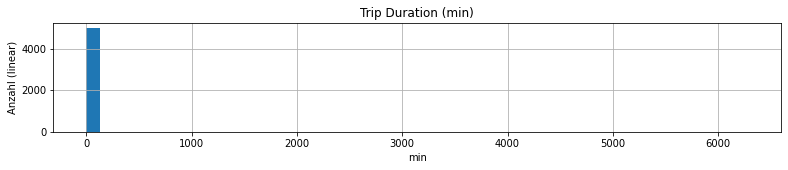

In [10]:
fig = plt.figure(figsize=(30, 2))

ax1 = plt.subplot(1, 2, 1)
_ = df_oct2019.hist(ax=ax1, column=['Trip Duration (min)'], figsize=(30,2), bins=50, log=False)
ax1.set_xlabel('min')
ax1.set_ylabel('Anzahl (linear)')

plt.show()

Es scheint nur eine Klasse nahe bei null zu geben. Die Zahlen oben haben schon gezeigt das 95% der Werte unter 33.1 Minuten liegen. Damit die Werte rechts auch ersichtlich werden, wird das Histogramm noch mit logarithmischer y-Achse erstellt.

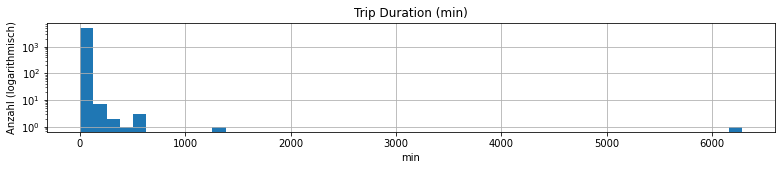

In [11]:
fig = plt.figure(figsize=(30, 2))

ax1 = plt.subplot(1, 2, 1)
df_oct2019.hist(ax=ax1, column=['Trip Duration (min)'], figsize=(30,2), bins=50, log=True)
ax1.set_xlabel('min')
ax1.set_ylabel('Anzahl (logarithmisch)')

plt.show()

Ab ca. 600 Minuten gibt quasi keine Klassen mehr. Da nur 5% der Werte (d.h. genau $5000 * 0.05 = 250$ Werte) über 33.1 Minuten liegen, wird für die Übersichtlichkeit noch ein Plot mit den Trips, die kürzer als 33.1 Minuten sind, erstellt.

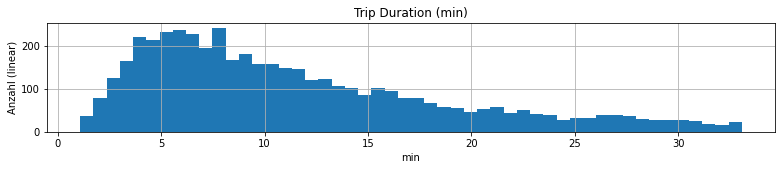

In [12]:
fig = plt.figure(figsize=(30, 2))

ax1 = plt.subplot(1, 2, 1)
df_oct2019[df_oct2019['Trip Duration (min)'] < 33.1].hist(ax=ax1, column=['Trip Duration (min)'], figsize=(30,2), bins=50, log=False)
ax1.set_xlabel('min')
ax1.set_ylabel('Anzahl (linear)')

plt.show()

Und dazu auch noch die Tabelle mit einer Beschreibung der Werte.

In [13]:
df_oct2019[df_oct2019['Trip Duration (min)'] < 33.1][[col for col in df_oct2019.columns if col.startswith('Trip Duration')]].describe(percentiles=[0.05, .25, .5, .75, .95])

Trip Duration  Trip Duration (min)  Trip Duration (h)  \
count     4751.00000           4751.00000         4751.00000   
mean       693.62345             11.56039            0.19267   
std        441.27930              7.35465            0.12258   
min         65.00000              1.08333            0.01806   
5%         179.00000              2.98333            0.04972   
25%        354.00000              5.90000            0.09833   
50%        575.00000              9.58333            0.15972   
75%        939.00000             15.65000            0.26083   
95%       1635.50000             27.25833            0.45431   
max       1985.00000             33.08333            0.55139   

       Trip Duration (d)  
count         4751.00000  
mean             0.00803  
std              0.00511  
min              0.00075  
5%               0.00207  
25%              0.00410  
50%              0.00666  
75%              0.01087  
95%              0.01893  
max              0.02297

Die Bikes werden eher nur sehr kurze Zeit genutzt. Dies hängt vermutlich mit dem Preismodell zusammen, bei welchem 30 minuten pro Trip für Customers gratis sind. Bei einem Subscriber sind 45 Minuten gratis. Die einzelnen Gruppen werden noch in einem Boxplot miteinander verglichen.

In [14]:
def  get_data_for_boxplot(max_duration_minutes = np.Inf):
    
    df = df_oct2019[df_oct2019['Trip Duration'] < max_duration_minutes]
    
    data = [
        df[df['User Type'] == 'Customer']['Trip Duration (min)'],
        df[df['User Type'] == 'Subscriber']['Trip Duration (min)'],
        df[df['Gender'] == '0']['Trip Duration (min)'],
        df[df['Gender'] == '1']['Trip Duration (min)'],
        df[df['Gender'] == '2']['Trip Duration (min)'],
        df[(df['User Type'] == 'Customer') & (df['Gender'] == '0')]['Trip Duration (min)'],
        df[(df['User Type'] == 'Customer') & (df['Gender'] == '1')]['Trip Duration (min)'],
        df[(df['User Type'] == 'Customer') & (df['Gender'] == '2')]['Trip Duration (min)'],
        df[(df['User Type'] == 'Subscriber') & (df['Gender'] == '0')]['Trip Duration (min)'],
        df[(df['User Type'] == 'Subscriber') & (df['Gender'] == '1')]['Trip Duration (min)'],
        df[(df['User Type'] == 'Subscriber') & (df['Gender'] == '2')]['Trip Duration (min)'],
    ]
    labels = [
        'Customers',
        'Subscribers',
        'Gender Unknown',
        'Male',
        'Women',
        'Customers & Gender Unknown',
        'Customers & Male',
        'Customers & Woman',
        'Subscribers & Gender Unknown',
        'Subscribers & Male',
        'Subscribers & Woman',
    ]
    
    return {'data': data, 'labels': labels}

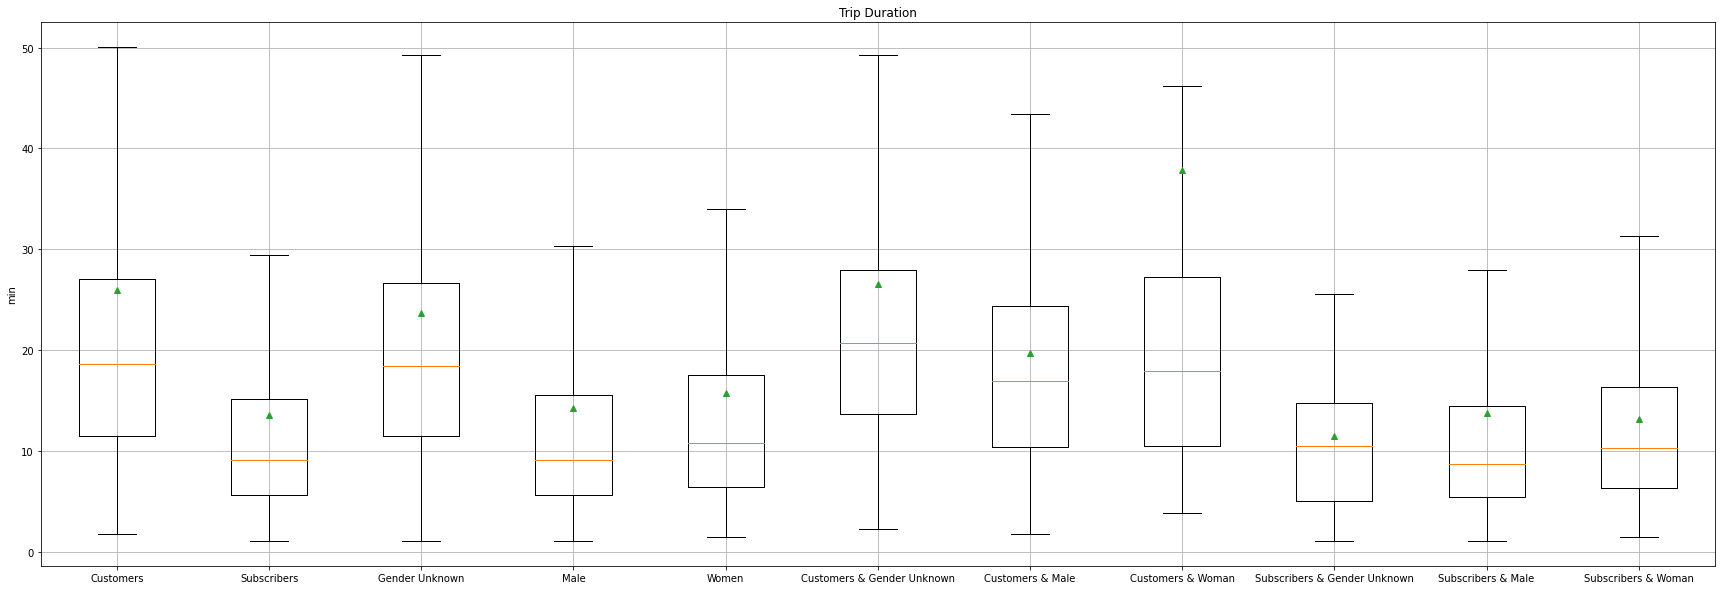

In [15]:
fig, ax = plt.subplots(figsize=(30, 10))
dict_data = get_data_for_boxplot()
_ = ax.boxplot(dict_data['data'], vert=True, showmeans=True, labels=dict_data['labels'], showfliers=False)
ax.set_ylabel('min')
ax.set_title('Trip Duration')
plt.grid(b=True)
#plt.tight_layout()
plt.show()

Folgendes fällt hier auf:
* Trips von Customern dauern länger als solche von Subscribern.
* Die Frauen nutzen die Bikes länger als die Männer. Benutzer die kein Geschlecht angeben, fahren länger als solche die ihr Geschlecht angeben.
* Bei den Subscribern ist mit Berücksichtigung des Geschlechts kein grosser Unterschied zu sehen und die durchschnittliche Dauer der Fahrten liegt nahe beieinander.

Obwohl ein Subscriber 45 Minuten pro Trip gratis fahren könnte, verwendet dieser die Bikes weniger lange als ein Customer mit nur 30 Minuten inklusive. Es wird vermutet, dass Subscriber mehrheitlich Touristen sind, welche Sightseeing betreiben und Subscriber in New York leben und das Bike nutzen, um z.B. zur Arbeit zu fahren.

## User Type und Gender 

Ein paar Untersuchungen zu User Type und Gender.

In [16]:
df_oct2019[['User Type', 'Gender']].describe()

User Type Gender
count         5000   5000
unique           2      3
top     Subscriber      1
freq          4288   3359

Anzahl der Trips, gruppiert nach User Type.

In [17]:
trip_count_by_user_type = df_oct2019.groupby(by=['User Type'])['Trip Duration'].agg('count')
trip_count_by_user_type.name = 'Trip Counts'
trip_count_by_user_type

User Type
Customer       712
Subscriber    4288
Name: Trip Counts, dtype: int64

Anzahl der Trips, gruppiert nach User Type und Gender.

In [18]:
trip_count_by_user_type_and_gender = df_oct2019.groupby(by=['User Type', 'Gender'])['Trip Duration'].agg('count')
trip_count_by_user_type_and_gender.name = 'Trip Counts'
trip_count_by_user_type_and_gender

User Type   Gender
Customer    0          320
            1          265
            2          127
Subscriber  0           75
            1         3094
            2         1119
Name: Trip Counts, dtype: int64

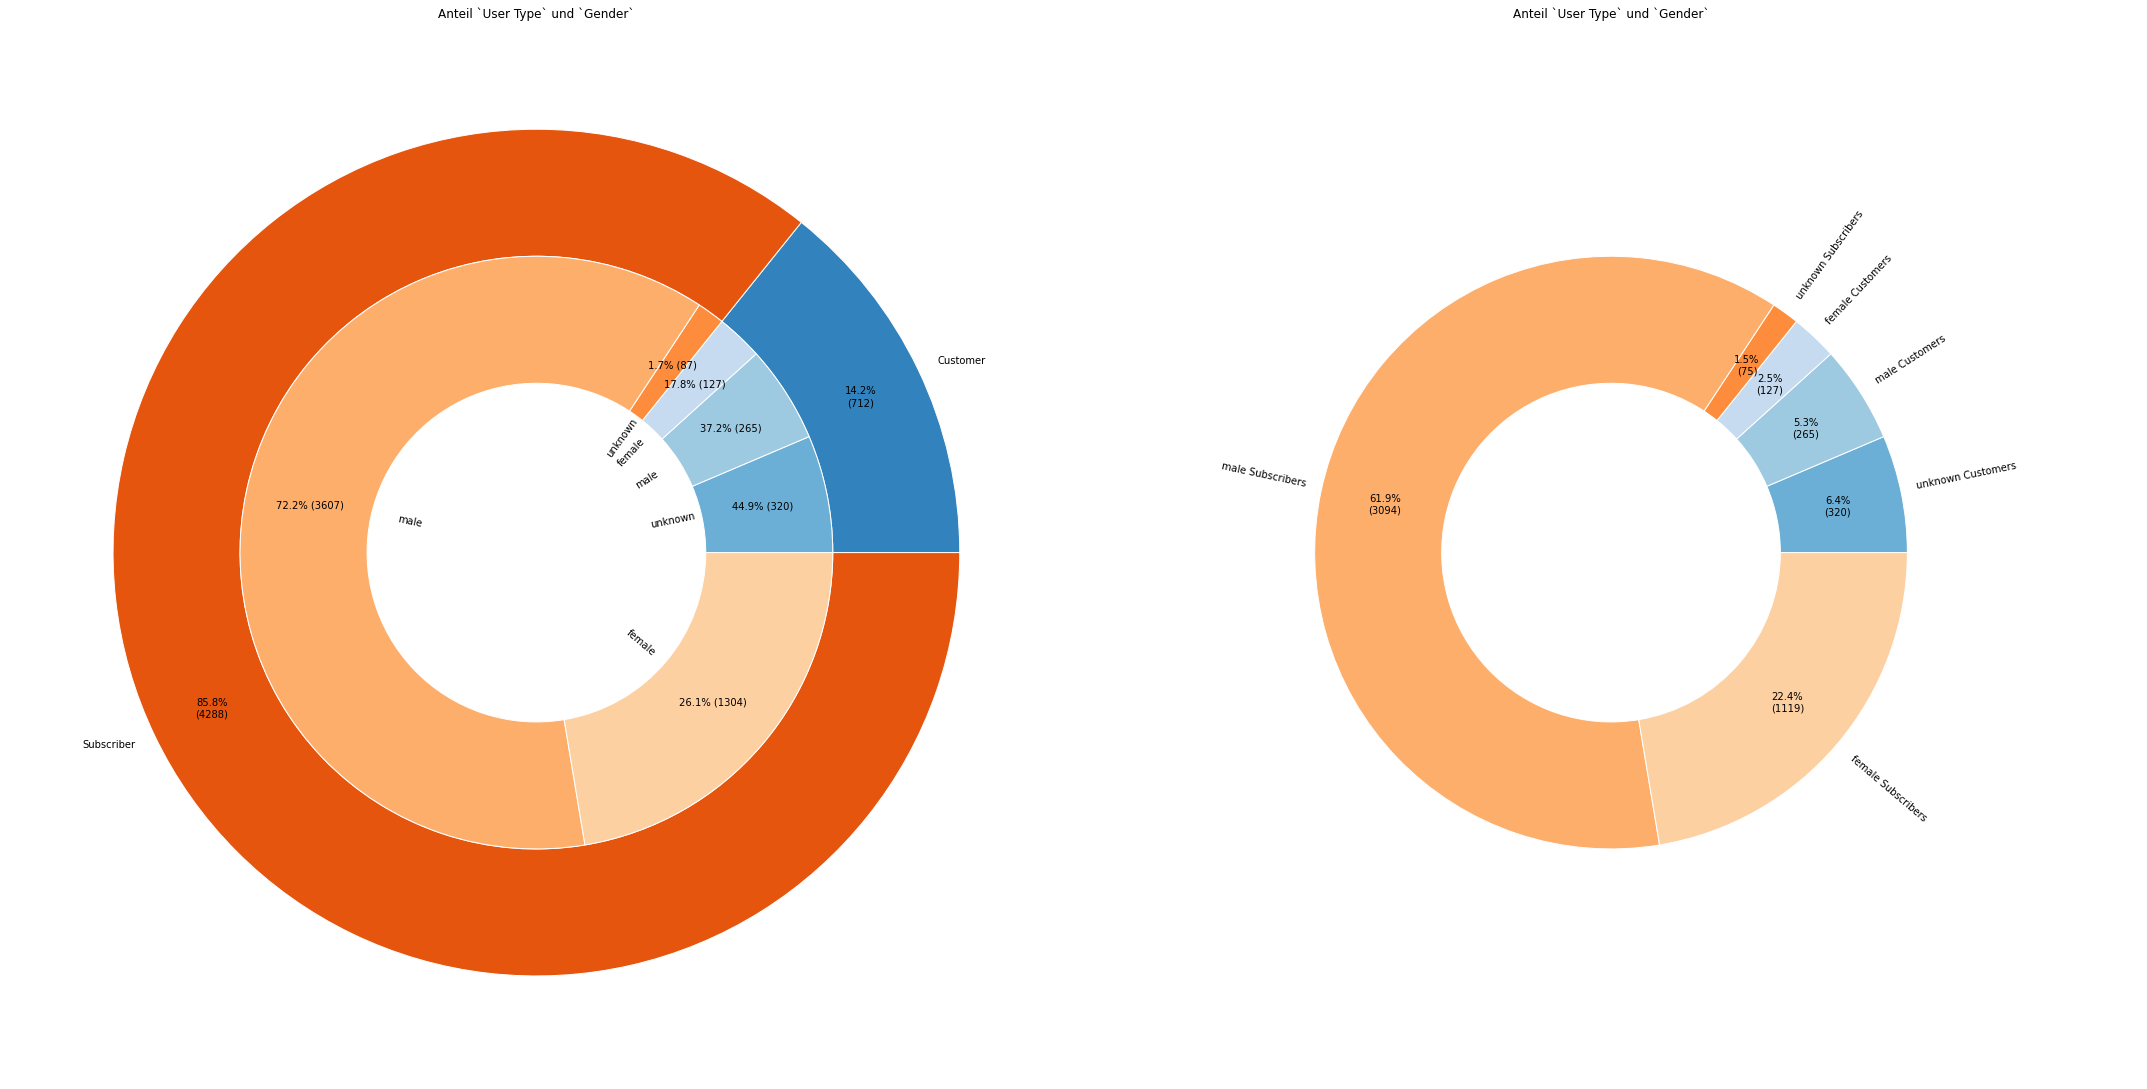

In [19]:
def func(pct, allvals):
    idx = np.argwhere(np.round(allvals / allvals.sum() * 100, 3).values == np.round(pct, 2))[0][0]
    absolute = int(allvals[idx])
    return "{:.1f}%\n({:d})".format(pct, absolute)

def func_inner(pct, allvals):
    idx = np.argwhere(np.round(allvals / allvals.sum() * 100, 3).values == np.round(pct, 2))[0][0]
    if idx <=2:
        pct_new = allvals[idx] / allvals[0:3].sum() * 100
        absolute = int(allvals[idx])
    else:
        pct_new = allvals[idx] / allvals[3:6].sum() * 100
        absolute = int(pct_new/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct_new, absolute)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 3, 5, 6, 7]))

outer_labels = ['Customer', 'Subscriber']
inner_labels = ['unknown', 'male', 'female', 'unknown', 'male', 'female']
inner_labels_abs = ['unknown Customers', 'male Customers', 'female Customers', 'unknown Subscribers', 'male Subscribers', 'female Subscribers']

ax[0].pie(trip_count_by_user_type, autopct=lambda pct: func(pct, trip_count_by_user_type), labels=outer_labels, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.85, labeldistance=1.05)

ax[0].pie(trip_count_by_user_type_and_gender, autopct=lambda pct: func_inner(pct, trip_count_by_user_type_and_gender), labels=inner_labels, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.78, labeldistance=0.39, rotatelabels=True)

ax[1].pie(trip_count_by_user_type_and_gender, autopct=lambda pct: func(pct, trip_count_by_user_type_and_gender), labels=inner_labels_abs, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.78, labeldistance=1.05, rotatelabels=True)

ax[0].set(aspect="equal", title='Anteil `User Type` und `Gender`')
ax[1].set(aspect="equal", title='Anteil `User Type` und `Gender`')

plt.tight_layout()
plt.show()

In der linken Grafik ist folgendes ersichtlich:
* Die Trips werden mit 85.8% überwiegend von Subscribern gefahren. Die Customer sind mit 14.2% in der Unterzahl.
* Hauptsächlich fahren Männer mit den Bikes. Von den Subscribern sind dies 72.2% Männer gegenüber 26.1% Frauen. Bei den Customern 37.2% Männer gegenüber 17.8% Frauen.
* Das Geschlecht wird bei den Subscribern fast immer angegeben, nur 1.7% geben bei einem Trip kein Geschlecht an. Bei den Customern wird das Geschlecht grösstenteils nicht angegeben, der Anteil ist hier mit 44.9% am höchsten.

Die rechte Grafik stellt das innere Diagramm einfach nochmal dar, die Zahlen beziehen sich hier aber auf die gesamte Anzahl der Trips.

## Age 2020

Ein paar Untersuchungen zu Age 2020.

In [20]:
df_oct2019[['Age 2020']].describe(percentiles=[0.05, .25, .5, .75, .95])

Age 2020
count 5000.00000
mean    39.61800
std     12.01451
min     17.00000
5%      24.00000
25%     30.00000
50%     37.00000
75%     51.00000
95%     60.00000
max    134.00000

Erkenntnisse aus der Übersicht:
* Der älteste Benutzer scheint hier 134 Jahre alt zu sein. Hier handelt es sich wohl um eine nicht korrekte Angabe des Alters.
* Der Jüngste Benuzter ist 17 Jahre alt.
* Im Durschnitt fahren 39 jährige Benutzer die Trips.
* Die über 60 jährigen fahren 5% der Trips.

### Anzahl Trips nach Alter

Untersuchung der Anzahl Trips nach Alter.

In [21]:
trip_count_customers_groupby_age = df_oct2019[df_oct2019['User Type'] == 'Customer'].groupby(by=['Age 2020', 'Gender'])['Trip Duration'].agg('count').reset_index().rename({'Trip Duration':'Trip count'}, axis=1)
trip_count_customers_groupby_age = trip_count_customers_groupby_age.pivot(index='Age 2020', columns='Gender', values='Trip count')
trip_count_customers_groupby_age.columns = ['unknown', 'male', 'female']
#trip_count_customers_groupby_age.head()

In [22]:
trip_count_subscribers_groupby_age = df_oct2019[df_oct2019['User Type'] == 'Subscriber'].groupby(by=['Age 2020', 'Gender'])['Trip Duration'].agg('count').reset_index().rename({'Trip Duration':'Trip count'}, axis=1)
trip_count_subscribers_groupby_age = trip_count_subscribers_groupby_age.pivot(index='Age 2020', columns='Gender', values='Trip count')
trip_count_subscribers_groupby_age.columns = ['unknown', 'male', 'female']
#trip_count_subscribers_groupby_age.head()

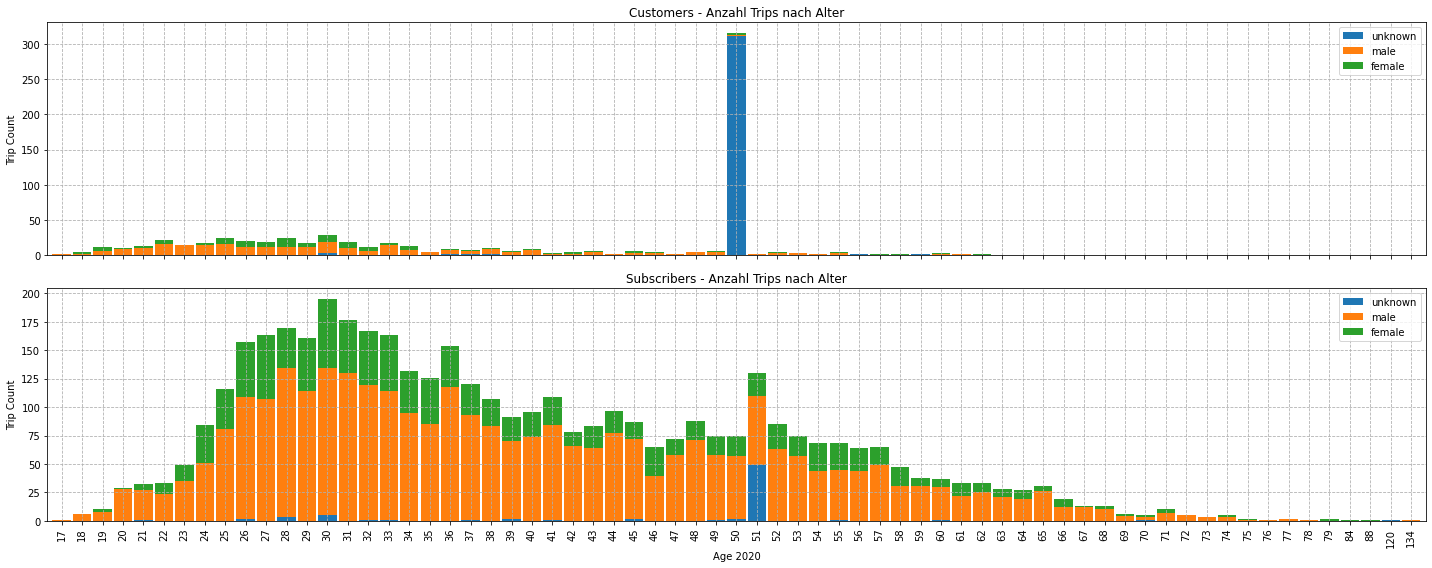

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 8), sharex=True, sharey=False)

trip_count_customers_groupby_age.plot(ax=ax[0], kind='bar', stacked=True, width=0.9)
ax[0].set_axisbelow(False)
ax[0].yaxis.grid(linestyle='dashed')
ax[0].xaxis.grid(linestyle='dashed')
ax[0].set_ylabel('Trip Count')
ax[0].set_title('Customers - Anzahl Trips nach Alter')

trip_count_subscribers_groupby_age.plot(ax=ax[1], kind='bar', stacked=True, width=0.9)
ax[1].set_axisbelow(False)
ax[1].yaxis.grid(linestyle='dashed')
ax[1].xaxis.grid(linestyle='dashed')
ax[1].set_ylabel('Trip Count')
ax[1].set_title('Subscribers - Anzahl Trips nach Alter')

plt.tight_layout()
plt.show()

In den beiden obenstehenden Grafiken ist folgendes ersichtlich:
* Die meisten Customer, die ihr Geschlecht bei einem Trip nicht angeben, sind 50 Jahre alt. Bei den Subscribern geben hauptsächlich die 51 jährigen ihr Geschlecht nicht an.
* Am meisten Trips wurden durch 30 jährige gefahren. Wobei hier der Anteil der Fahrten von Männern höher ist, als der der Frauen.

## Station

Ein paar Untersuchungen zu den Stationen.

In [24]:
df_oct2019[[col for col in df_oct2019.columns if col.endswith('Station Latitude') or col.endswith('Station Longitude') or col.endswith('Station Name') or col == 'Linear Distance']].describe(include='all')

Start Station Name  Start Station Latitude  \
count                    5000              5000.00000   
unique                    715                     nan   
top     Pershing Square North                     nan   
freq                       34                     nan   
mean                      NaN                40.73813   
std                       NaN                 0.02969   
min                       NaN                40.65709   
25%                       NaN                40.71910   
50%                       NaN                40.73902   
75%                       NaN                40.75763   
max                       NaN                40.81830   

        Start Station Longitude       End Station Name  End Station Latitude  \
count                5000.00000                   5000            5000.00000   
unique                      nan                    714                   nan   
top                         nan  Pershing Square North                   nan   
freq                        nan                     50                   nan   
mean                  -73.98222                    NaN              40.73742   
std                     0.01951                    NaN               0.02940   
min                   -74.02535                    NaN              40.65540   
25%                   -73.99530                    NaN              40.71850   
50%                   -73.98518                    NaN              40.73827   
75%                   -73.97189                    NaN              40.75643   
max                   -73.90774                    NaN              40.81830   

        End Station Longitude  Linear Distance  
count              5000.00000       5000.00000  
unique                    nan              nan  
top                       nan              nan  
freq                      nan              nan  
mean                -73.98255          1.75303  
std                   0.01981          1.36817  
min                 -74.02535          0.00000  
25%                 -73.99596          0.83659  
50%                 -73.98658          1.34903  
75%                 -73.97209          2.24275  
max                 -73.90904         11.32096

Erkenntnisse aus der Übersicht:
* Start und End Station ID haben das Skalenniveau 'nominal', daher machen die Werte für diese beiden Spalten keinen Sinn und wurden daher weggelassen.
* Start und End Station Name sind zwar auch 'nominal', aber die Übersicht gibt hier doch ein paar Werte aus die sinnvoll sind.
* Es gibt 715 verschiedene Stationen von welchen aus Trips gestartet wurden und 714 verschiedene Stationen an welchen Trips endeten.
* Top Start und End Station ist 'Persing Square North'. Es wurden 34 Trips ab dieser Station gestartet und 50 Trips endeten an der Station.
* Örtlich liegen die Stationen nahe beeinander, denn die Standardabweichung ist sehr klein. Auch der minimale und maximale Wert bei Latitude und Longitude liegen nahe beieinander. Bei Latitude nicht mehr als 18km und bei Longitude nicht mehr als 13km.
* Die Stationen liegen nie weiter als 11km Luftlinie auseinander. Dies sieht man am Maximalwert in der Spalte 'Linear Distance'.
* Bei 'Linear Distance' ist der minimale Wert 0km, dies weil Trips an der gleichen Station enden können an welcher sie gestartet wurden.
* Durchschnittlich enden die Trips an einer 1.8km entfernten Station.

### Distanz der Trips nach Alter

Untersuchung der Distanz der Trips nach Alter.

In [25]:
trip_distance_customers_groupby_age = df_oct2019[df_oct2019['User Type'] == 'Customer'].groupby(by=['Age 2020', 'Gender'])['Linear Distance'].agg('sum').reset_index().rename({'Linear Distance':'Linear Distance sum'}, axis=1)
trip_distance_customers_groupby_age = trip_distance_customers_groupby_age.pivot(index='Age 2020', columns='Gender', values='Linear Distance sum')
trip_distance_customers_groupby_age.columns = ['unknown', 'male', 'female']
trip_distance_customers_groupby_age.head()

unknown     male  female
Age 2020                          
18            nan  7.78611     nan
19            nan  2.68068 5.77759
20            nan  5.29685 7.05236
21            nan 14.23288 3.58641
22            nan 13.07416 6.29207

In [26]:
trip_distance_subscribers_groupby_age = df_oct2019[df_oct2019['User Type'] == 'Subscriber'].groupby(by=['Age 2020', 'Gender'])['Linear Distance'].agg('sum').reset_index().rename({'Linear Distance':'Linear Distance sum'}, axis=1)
trip_distance_subscribers_groupby_age = trip_distance_subscribers_groupby_age.pivot(index='Age 2020', columns='Gender', values='Linear Distance sum')
trip_distance_subscribers_groupby_age.columns = ['unknown', 'male', 'female']
trip_distance_subscribers_groupby_age.head()

unknown     male  female
Age 2020                          
17            nan  5.54349     nan
18            nan 10.42336     nan
19            nan  5.71189 1.76693
20            nan 33.78851 0.00000
21        0.90272 47.93252 7.87548

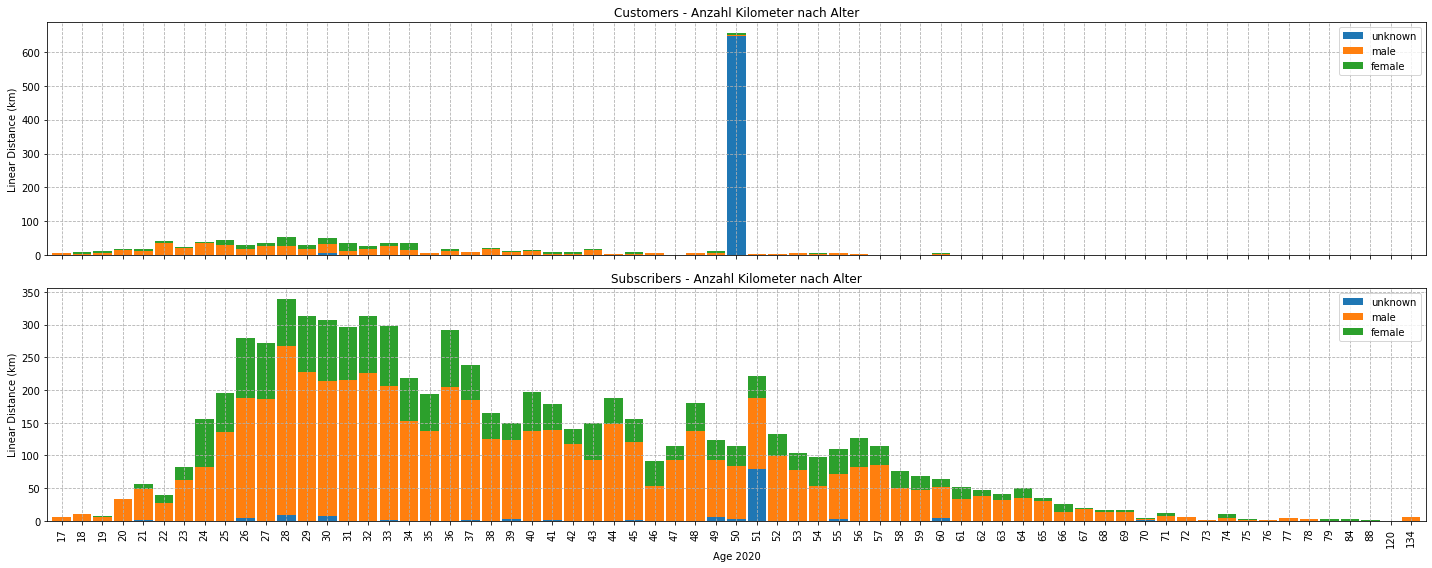

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 8), sharex=True, sharey=False)

trip_distance_customers_groupby_age.plot(ax=ax[0], kind='bar', stacked=True, width=0.9)
ax[0].set_axisbelow(False)
ax[0].yaxis.grid(linestyle='dashed')
ax[0].xaxis.grid(linestyle='dashed')
ax[0].set_ylabel('Linear Distance (km)')
ax[0].set_title('Customers - Anzahl Kilometer nach Alter')

trip_distance_subscribers_groupby_age.plot(ax=ax[1], kind='bar', stacked=True, width=0.9)
ax[1].set_axisbelow(False)
ax[1].yaxis.grid(linestyle='dashed')
ax[1].xaxis.grid(linestyle='dashed')
ax[1].set_ylabel('Linear Distance (km)')
ax[1].set_title('Subscribers - Anzahl Kilometer nach Alter')

plt.tight_layout()
plt.show()

In den beiden obenstehenden Grafiken ist folgendes ersichtlich:
* Die 50 jährigen Customer, die am meisten Trips gefahren sind, legen natürlich auch die grösste Distanz zurück.
* Die 28 jährigen legen bei den Subscribern am meiten Kilometer zurück.

### Top Stationen

In [28]:
starts_count = df_oct2019.groupby(by=['Start Station Name'])['Trip Duration'].agg('count').reset_index().rename({'Trip Duration' :'Starts count', 'Start Station Name': 'Station Name'}, axis=1).set_index('Station Name')
#starts_count.head()

In [29]:
ends_count = df_oct2019.groupby(by=['End Station Name'])['Trip Duration'].agg('count').reset_index().rename({'Trip Duration' :'Ends count', 'End Station Name': 'Station Name'}, axis=1).set_index('Station Name')
#ends_count.head()

In [30]:
start_stations = df_oct2019[[col for col in df_oct2019.columns if col.startswith('Start Station')]].rename({'Start Station ID': 'Station ID', 'Start Station Name': 'Station Name', 'Start Station Latitude': 'Latitude', 'Start Station Longitude': 'Longitude'}, axis=1).set_index('Station Name')
start_stations = start_stations[start_stations.duplicated() == False]
#start_stations

In [31]:
end_stations = df_oct2019[[col for col in df_oct2019.columns if col.startswith('End Station')]].rename({'End Station ID': 'Station ID', 'End Station Name': 'Station Name', 'End Station Latitude': 'Latitude', 'End Station Longitude': 'Longitude'}, axis=1).set_index('Station Name')
end_stations = end_stations[end_stations.duplicated() == False]
#end_stations

In [32]:
stations = pd.concat([start_stations, end_stations])
stations = stations[stations.duplicated() == False]
#stations

In [89]:
trip_counts_by_station = pd.concat([starts_count, ends_count, stations], axis=1)
trip_counts_by_station.insert(2, 'Trip count', trip_counts_by_station[['Starts count', 'Ends count']].sum(axis=1))
trip_counts_by_station = trip_counts_by_station.sort_values(by='Trip count', ascending=False)
trip_counts_by_station.index.name = 'Station Name'
#trip_counts_by_station.head()

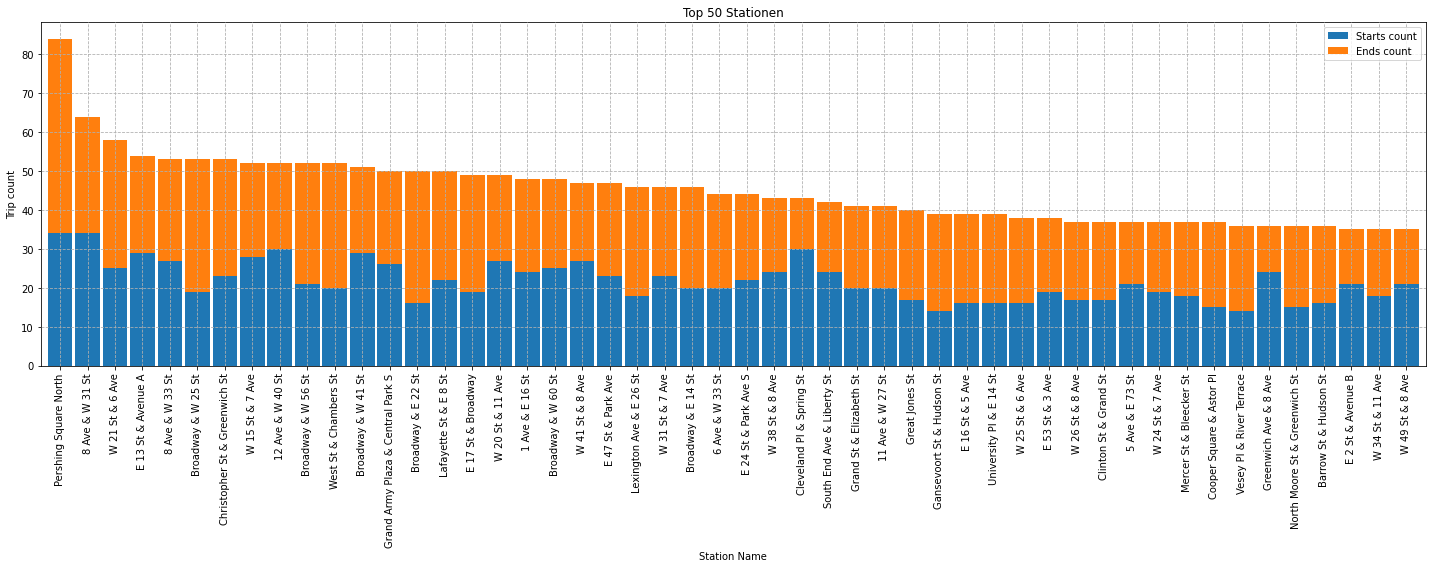

In [34]:
fig, ax = plt.subplots(figsize=(20, 8))

trip_counts_by_station[0:50][['Starts count', 'Ends count']].plot(ax=ax, kind='bar', stacked=True, width=0.9)
ax.set_axisbelow(False)
ax.yaxis.grid(linestyle='dashed')
ax.xaxis.grid(linestyle='dashed')
ax.set_ylabel('Trip count')
ax.set_title('Top 50 Stationen')

plt.tight_layout()
plt.show()

Die 50 Stationen mit den meisten Trips wurden in einem Barplot dargestellt.
* Die Station 'Pershing Square North' ist mit über 80 Trips an erster Stelle.
* Die Station 'W49 St & 8 Ave' bildet mit ca. 35 Trips das Schlusslicht der Top 50.

Die Top 50 Stationen werden noch auf einer Map dargestellt. Dabei stellt die Grösse und die Farbe des Kreises die Anzahl Trips dar. Gelb ist die Station 'Pershing Square North' mit den meisten Trips. Diese liegt am Grand Central Terminal, was vermutlich auch der Grund für die stärkere Auslastung ist.

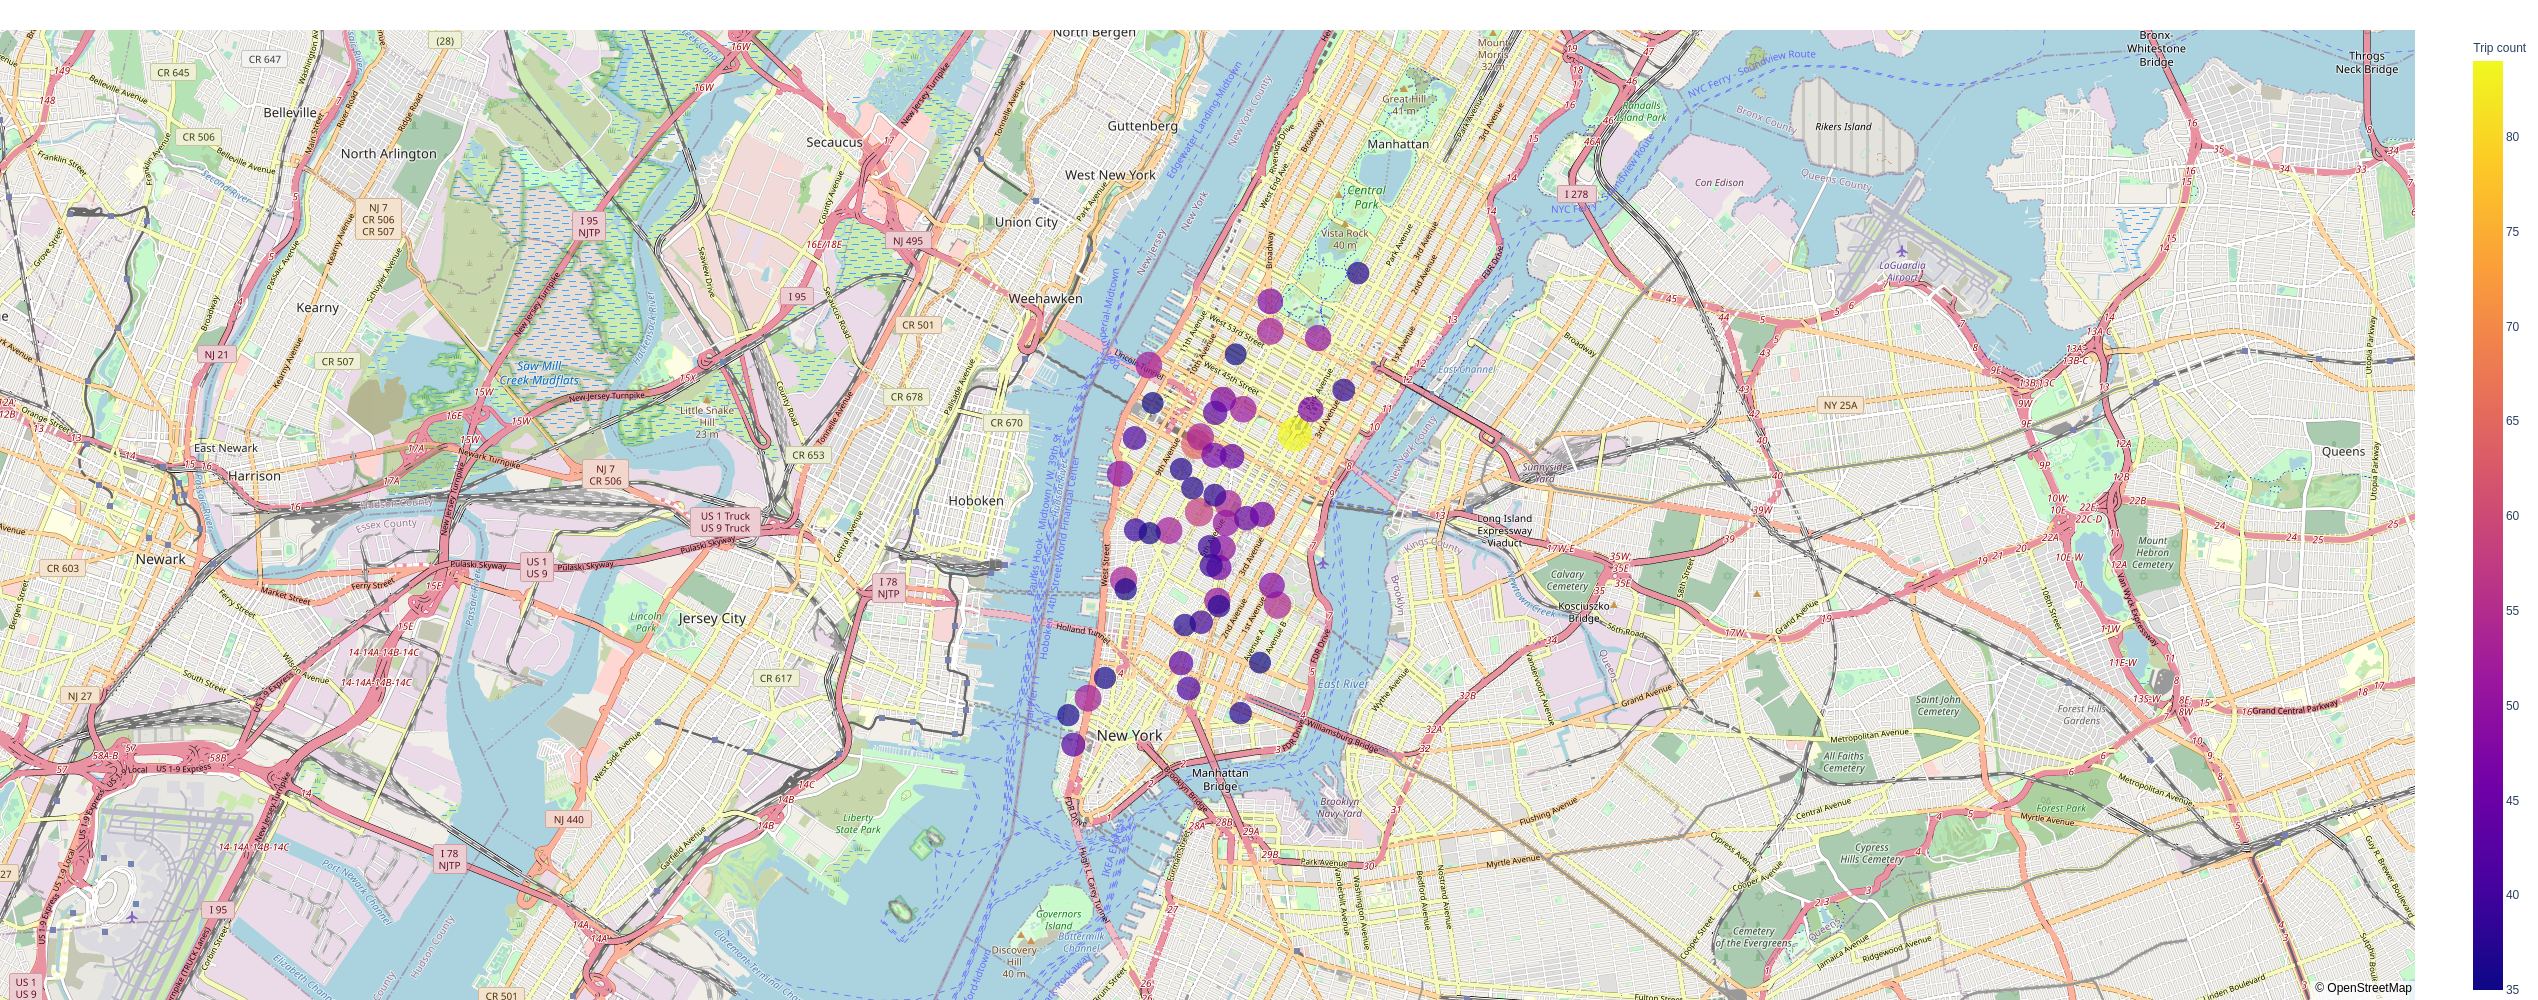

In [90]:
fig_px = px.scatter_mapbox(
    trip_counts_by_station[0:50].reset_index(), 
    lat='Latitude', lon='Longitude', 
    hover_name='Station Name',
    size='Trip count',
    size_max=25,
    color='Trip count',
    zoom=12,
    mapbox_style='open-street-map',
    width=800, height=1000
)
_ = fig_px.update_layout(
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0}
)
fig_px.show()

In [36]:
##### NEXT ANALYSIS ###

# Analyse ```summary-daily-subscribers_only-citibike-tripweather.parquet```

## Merkmale

In [37]:
df_sumsubs = pd.read_parquet(os.path.join(path, 'summary-daily-subscribers_only-citibike-tripweather.parquet'))

In [38]:
df_sumsubs.tail().T

Date                    2020-04-26  2020-04-27  2020-04-28  2020-04-29  \
Trip count              7658.00000 14942.00000 28808.00000 17793.00000   
Trip Duration mean       909.11413   909.51151  1162.71529   944.66768   
Trip Duration std        872.16502   867.31142  1077.94083   873.58187   
Trip Duration min         61.00000    61.00000    61.00000    61.00000   
Trip Duration median     639.50000   659.00000   894.00000   690.00000   
Trip Duration max      17985.00000 21000.00000 20394.00000 16614.00000   
Linear Distance mean       1.77203     1.85279     2.09608     1.92779   
Linear Distance std        1.69919     1.69954     1.84255     1.78455   
Linear Distance min        0.00000     0.00000     0.00000     0.00000   
Linear Distance median     1.24292     1.34243     1.58105     1.39203   
Linear Distance max       15.28464    13.50936    14.51794    14.12451   
Age 2020 count          7658.00000 14942.00000 28808.00000 17793.00000   
Age 2020 mean             39.81431    40.77379    39.99729    40.47935   
Age 2020 std              11.95044    12.24587    12.11880    12.16765   
Age 2020 min              17.00000    16.00000    16.00000    16.00000   
Age 2020 median           37.00000    38.00000    37.00000    38.00000   
Age 2020 max              80.00000    80.00000    81.00000    81.00000   
temp mean                  9.09741     6.84308    10.30875    10.79875   
temp std                   0.82874     1.61124     4.86921     1.75832   
temp median                9.16000     6.69000     7.74500    10.74500   
temp min                   7.91000     4.51000     4.98000     8.38000   
temp max                  11.37000     9.64000    18.25000    14.69000   
humidity mean             75.74074    77.42308    59.37500    74.04167   
humidity std              14.62241    10.83761    17.34512    10.46518   
humidity median           76.00000    81.00000    66.00000    76.00000   
humidity min              40.00000    57.00000    25.00000    50.00000   
humidity max              93.00000    93.00000    75.00000    87.00000   
wind_speed mean            5.79926     3.18462     3.21000     4.74708   
wind_speed std             2.47887     1.32082     1.68901     2.19028   
wind_speed median          5.68000     3.10000     2.60000     4.85000   
wind_speed min             2.10000     1.50000     1.50000     1.50000   
wind_speed max             9.80000     7.20000     7.15000     8.70000   
rain_1h sum                5.27000     1.95000     0.00000     0.29000   
rain_1h min                0.00000     0.00000     0.00000     0.00000   
rain_1h max                1.01000     0.35000     0.00000     0.29000   
snow_1h sum                0.00000     0.00000     0.00000     0.00000   
snow_1h min                0.00000     0.00000     0.00000     0.00000   
snow_1h max                0.00000     0.00000     0.00000     0.00000   

Date                    2020-04-30  
Trip count             12297.00000  
Trip Duration mean       899.94633  
Trip Duration std        879.19177  
Trip Duration min         61.00000  
Trip Duration median     640.00000  
Trip Duration max      19953.00000  
Linear Distance mean       1.77484  
Linear Distance std        1.67552  
Linear Distance min        0.00000  
Linear Distance median     1.27195  
Linear Distance max       16.66022  
Age 2020 count         12297.00000  
Age 2020 mean             40.64471  
Age 2020 std              12.09568  
Age 2020 min              17.00000  
Age 2020 median           38.00000  
Age 2020 max              81.00000  
temp mean                 11.83769  
temp std                   1.89143  
temp median               10.82500  
temp min                  10.02000  
temp max                  15.11000  
humidity mean             84.80769  
humidity std               6.98008  
humidity median           87.00000  
humidity min              71.00000  
humidity max              93.00000  
wind_speed mean            6.13077  
wind_speed std             1.59819  
win

| Statistische Einheit | Merkmal                    | Skalenniveau    | Kontinuität | Beschreibung
| ---------------------| ---------------------------| --------------- | ----------- | -------------
| Day                  | **Date**                   | **Intervall**   | diskret     | Datum
| Trip                 | **Trip count**             | **Verhältnis**  | diskret     | Gesamte Anzahl Trips an diesem Tag
| Trip                 | **Trip Duration mean**     | **Verhältnis**  | stetig      | Durchschnittliche Dauer
| Trip                 | **Trip Duration std**      | **Verhältnis**  | stetig      | Standardabweichung der Dauer
| Trip                 | **Trip Duration min**      | **Verhältnis**  | stetig      | Dauer des schnellsten Trips
| Trip                 | **Trip Duration median**   | **Verhältnis**  | stetig      | Median der Dauer
| Trip                 | **Trip Duration max**      | **Verhältnis**  | stetig      | Dauer des längsten Trips
| Trip                 | **Linear Distance mean**   | **Verhältnis**  | stetig      | Durchschnittliche Distanz (Luftlinie zwischen Stationen)
| Trip                 | **Linear Distance std**    | **Verhältnis**  | stetig      | Standardabweichung der Distanz
| Trip                 | **Linear Distance min**    | **Verhältnis**  | stetig      | Distanz des kürzesten Trips
| Trip                 | **Linear Distance median** | **Verhältnis**  | stetig      | Median der Distanz 
| Trip                 | **Linear Distance max**    | **Verhältnis**  | stetig      | Distanz des weitesten Trips
| User                 | **Age 2020 count**         | **Verhältnis**  | diskret     | Gesamte Anzahl angegebener Alter
| User                 | **Age 2020 mean**          | **Verhältnis**  | stetig      | Durchschnittliches Alter
| User                 | **Age 2020 std**           | **Verhältnis**  | diskret     | Standardabweichung des Alters
| User                 | **Age 2020 min**           | **Verhältnis**  | diskret     | Jüngstes Alter
| User                 | **Age 2020 median**        | **Verhältnis**  | stetig      | Median des Alters
| User                 | **Age 2020 max**           | **Verhältnis**  | diskret     | Ältestes Alter
| Temperature          | **temp mean**              | **Intervall**   | stetig      | Durchschnittliche Temperatur (°C)
| Temperature          | **temp std**               | **Intervall**   | stetig      | Standardabweichung der Temperatur (°C)
| Temperature          | **temp median**            | **Intervall**   | stetig      | Median der Temperatur (°C)
| Temperature          | **temp min**               | **Intervall**   | stetig      | Tiefste Temperatur (°C)
| Temperature          | **temp max**               | **Intervall**   | stetig      | Höchste Temperatur (°C)
| Wind                 | **wind_speed mean**        | **Verhältnis**  | stetig      | Durchschnittliche Windgeschwindigkeit (m/s)
| Wind                 | **wind_speed std**         | **Verhältnis**  | stetig      | Standardabweichung der Windgeschwindigkeit (m/s)
| Wind                 | **wind_speed median**      | **Verhältnis**  | stetig      | Median der Windgeschwindigkeit (m/s)
| Wind                 | **wind_speed min**         | **Verhältnis**  | stetig      | Tiefste Windgeschwindigkeit (m/s)
| Wind                 | **wind_speed max**         | **Verhältnis**  | stetig      | Höchste Windgeschwindigkeit (m/s)
| Rainfall             | **rain_1h sum**            | **Verhältnis**  | stetig      | Gesamte Menge an Niederschlag (mm)
| Rainfall             | **rain_1h min**            | **Verhältnis**  | stetig      | Tiefste Menge an Niederschlag in 1h am Tag (mm)
| Rainfall             | **rain_1h max**            | **Verhältnis**  | stetig      | Höchste Menge an Niederschlag in 1h am Tag (mm)
| Snowfall             | **snow_1h sum**            | **Verhältnis**  | stetig      | Gesamte Menge an Schneefall (mm)
| Snowfall             | **snow_1h min**            | **Verhältnis**  | stetig      | Tiefste Menge an Schneefall in 1h am Tag (mm)
| Snowfall             | **snow_1h max**            | **Verhältnis**  | stetig      | Höchste Menge an Schneefall in 1h am Tag (mm)

# Analyse ```summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet```

## Merkmale

In [39]:
df_sumsubs_bygen = pd.read_parquet(os.path.join(path, 'summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet'))

In [40]:
df_sumsubs_bygen.tail().T

Date                    2020-04-29  2020-04-29 2020-04-30  2020-04-30  \
Gender                           1           2          0           1   
Trip count             12383.00000  5180.00000  181.00000  8895.00000   
Trip Duration mean       911.63708  1023.60927  968.38674   870.98954   
Trip Duration std        869.96530   877.27523  968.50382   887.19920   
Trip Duration min         61.00000    62.00000  108.00000    61.00000   
Trip Duration median     654.00000   789.50000  549.00000   609.00000   
Trip Duration max      16614.00000 16300.00000 6190.00000 19953.00000   
Linear Distance mean       1.89932     1.99754    1.81687     1.72799   
Linear Distance std        1.78566     1.77725    1.92322     1.65931   
Linear Distance min        0.00000     0.00000    0.00000     0.00000   
Linear Distance median     1.35603     1.47473    1.08924     1.22591   
Linear Distance max       14.12451    12.30219    8.51553    16.66022   
Age 2020 count         12383.00000  5180.00000  181.00000  8895.00000   
Age 2020 mean             40.72963    39.72220   44.00000    41.02530   
Age 2020 std              12.23206    12.04447    9.85788    12.20961   
Age 2020 min              16.00000    16.00000   24.00000    17.00000   
Age 2020 median           38.00000    36.00000   51.00000    39.00000   
Age 2020 max              80.00000    79.00000   70.00000    81.00000   
temp mean                 10.79875    10.79875   11.83769    11.83769   
temp std                   1.75832     1.75832    1.89143     1.89143   
temp median               10.74500    10.74500   10.82500    10.82500   
temp min                   8.38000     8.38000   10.02000    10.02000   
temp max                  14.69000    14.69000   15.11000    15.11000   
humidity mean             74.04167    74.04167   84.80769    84.80769   
humidity std              10.46518    10.46518    6.98008     6.98008   
humidity median           76.00000    76.00000   87.00000    87.00000   
humidity min                    50          50         71          71   
humidity max                    87          87         93          93   
wind_speed mean            4.74708     4.74708    6.13077     6.13077   
wind_speed std             2.19028     2.19028    1.59819     1.59819   
wind_speed median          4.85000     4.85000    6.20000     6.20000   
wind_speed min             1.50000     1.50000    3.10000     3.10000   
wind_speed max             8.70000     8.70000    8.70000     8.70000   
rain_1h sum                0.29000     0.29000   10.32000    10.32000   
rain_1h min                0.00000     0.00000    0.00000     0.00000   
rain_1h max                0.29000     0.29000    1.27000     1.27000   
snow_1h sum                0.00000     0.00000    0.00000     0.00000   
snow_1h min                0.00000     0.00000    0.00000     0.00000   
snow_1h max                0.00000     0.00000    0.00000     0.00000   

Date                    2020-04-30  
Gender                           2  
Trip count              3221.00000  
Trip Duration mean       976.06644  
Trip Duration std        846.63441  
Trip Duration min         61.00000  
Trip Duration median     739.00000  
Trip Duration max      13597.00000  
Linear Distance mean       1.90184  
Linear Distance std        1.69891  
Linear Distance min        0.00000  
Linear Distance median     1.40006  
Linear Distance max       11.43502  
Age 2020 count          3221.00000  
Age 2020 mean             39.40515  
Age 2020 std              11.78659  
Age 2020 min              17.00000  
Age 2020 median           36.00000  
Age 2020 max              77.00000  
temp mean                 11.83769  
temp std                   1.89143  
temp median               10.82500  
temp min                  10.02000  
temp max                  15.11000  
humidity mean             84.80769  
humidity std               6.98008  
humidity median           87.00000  
humidity min                    71  
humidity max                    93  
wind_s

Zusätzlich zu den Merkmalen aus ```summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet```, gibt es noch zusätzlich das folgende Merkmal:

| Statistische Einheit | Merkmal                    | Skalenniveau   | Beschreibung
| ---------------------| ---------------------------| ---------------| -------------
| User                 | **Gender**                 | **Nominal**    | Geschlecht des Benutzers: ```0```=_unknown_; ```1```=_male_; ```2```=_female_ 

# OLD!!!!

## Analyse

In [41]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [42]:
%matplotlib inline

In [43]:
pd.options.display.float_format = '{:.5f}'.format

In [44]:
path = './../data/citibike/tripdata'

### Tripweather Oktober 2019

In [45]:
tripweather = pd.read_parquet(os.path.join(path, 'samples_5000_201910-citibike-tripweather-data.parquet'))

In [46]:
tripweather.head()

dt_utc  Trip Duration                Start Time  \
811188  2019-10-12 16:20:30+00:00            357 2019-10-12 12:20:30-04:00   
623554  2019-10-10 01:07:17+00:00            299 2019-10-09 21:07:17-04:00   
1722948 2019-10-25 21:17:12+00:00            552 2019-10-25 17:17:12-04:00   
1493393 2019-10-22 21:36:53+00:00            220 2019-10-22 17:36:53-04:00   
909432  2019-10-13 20:59:23+00:00           2063 2019-10-13 16:59:23-04:00   

                        Stop Time  Start Station ID  \
811188  2019-10-12 12:26:27-04:00              3411   
623554  2019-10-09 21:12:16-04:00              3102   
1722948 2019-10-25 17:26:25-04:00              3233   
1493393 2019-10-22 17:40:34-04:00               296   
909432  2019-10-13 17:33:46-04:00              3777   

                Start Station Name  Start Station Latitude  \
811188         Bond St & Bergen St                40.68497   
623554     Driggs Ave & Lorimer St                40.72179   
1722948            E 48 St & 5 Ave                40.75725   
1493393       Division St & Bowery                40.71413   
909432   Stockholm St & Wilson Ave                40.69930   

         Start Station Longitude  End Station ID  \
811188                 -73.98621              83   
623554                 -73.95042            3094   
1722948                -73.97806             486   
1493393                -73.99705             307   
909432                 -73.92304            3346   

                      End Station Name  ...     temp  pressure  humidity  \
811188   Atlantic Ave & Fort Greene Pl  ... 15.38000      1015        69   
623554         Graham Ave & Withers St  ... 12.22000      1024        73   
1722948             Broadway & W 29 St  ... 17.38000      1022        73   
1493393          Canal St & Rutgers St  ... 15.35000      1012        92   
909432             Berkeley Pl & 7 Ave  ... 18.04000      1017        62   

        wind_speed  rain_1h snow_1h  clouds_all  weather_id  weather_main  \
811188     3.05000  0.00000 0.00000          60         803        Clouds   
623554     8.20000  0.25000 0.00000           0         500          Rain   
1722948    5.04000  0.00000 0.00000         100         804        Clouds   
1493393    9.64000  0.39000 0.00000         100         500          Rain   
909432     3.66000  0.00000 0.00000         100         804        Clouds   

         weather_description  
811188         broken clouds  
623554            light rain  
1722948      overcast clouds  
1493393           light rain  
909432       overcast clouds  

[5 rows x 28 columns]

In [47]:
tripweather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 811188 to 1539374
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype                     
---  ------                   --------------  -----                     
 0   dt_utc                   5000 non-null   datetime64[ns, UTC]       
 1   Trip Duration            5000 non-null   Int64                     
 2   Start Time               5000 non-null   datetime64[ns, US/Eastern]
 3   Stop Time                5000 non-null   datetime64[ns, US/Eastern]
 4   Start Station ID         5000 non-null   Int64                     
 5   Start Station Name       5000 non-null   object                    
 6   Start Station Latitude   5000 non-null   float64                   
 7   Start Station Longitude  5000 non-null   float64                   
 8   End Station ID           5000 non-null   Int64                     
 9   End Station Name         5000 non-null   object                    
 10  End 

In [48]:
tripweather.shape

(5000, 28)

In [49]:
tripweather.isna().sum().sum()

0

In [50]:
def filter_numeric_columns(df):
    res = []
    for col in df.columns:
        if df[col].dtype == np.float64 or df[col].dtype == np.int64 or isinstance(df[col].dtype, pd.Int64Dtype):
            res.append(col)
    return res

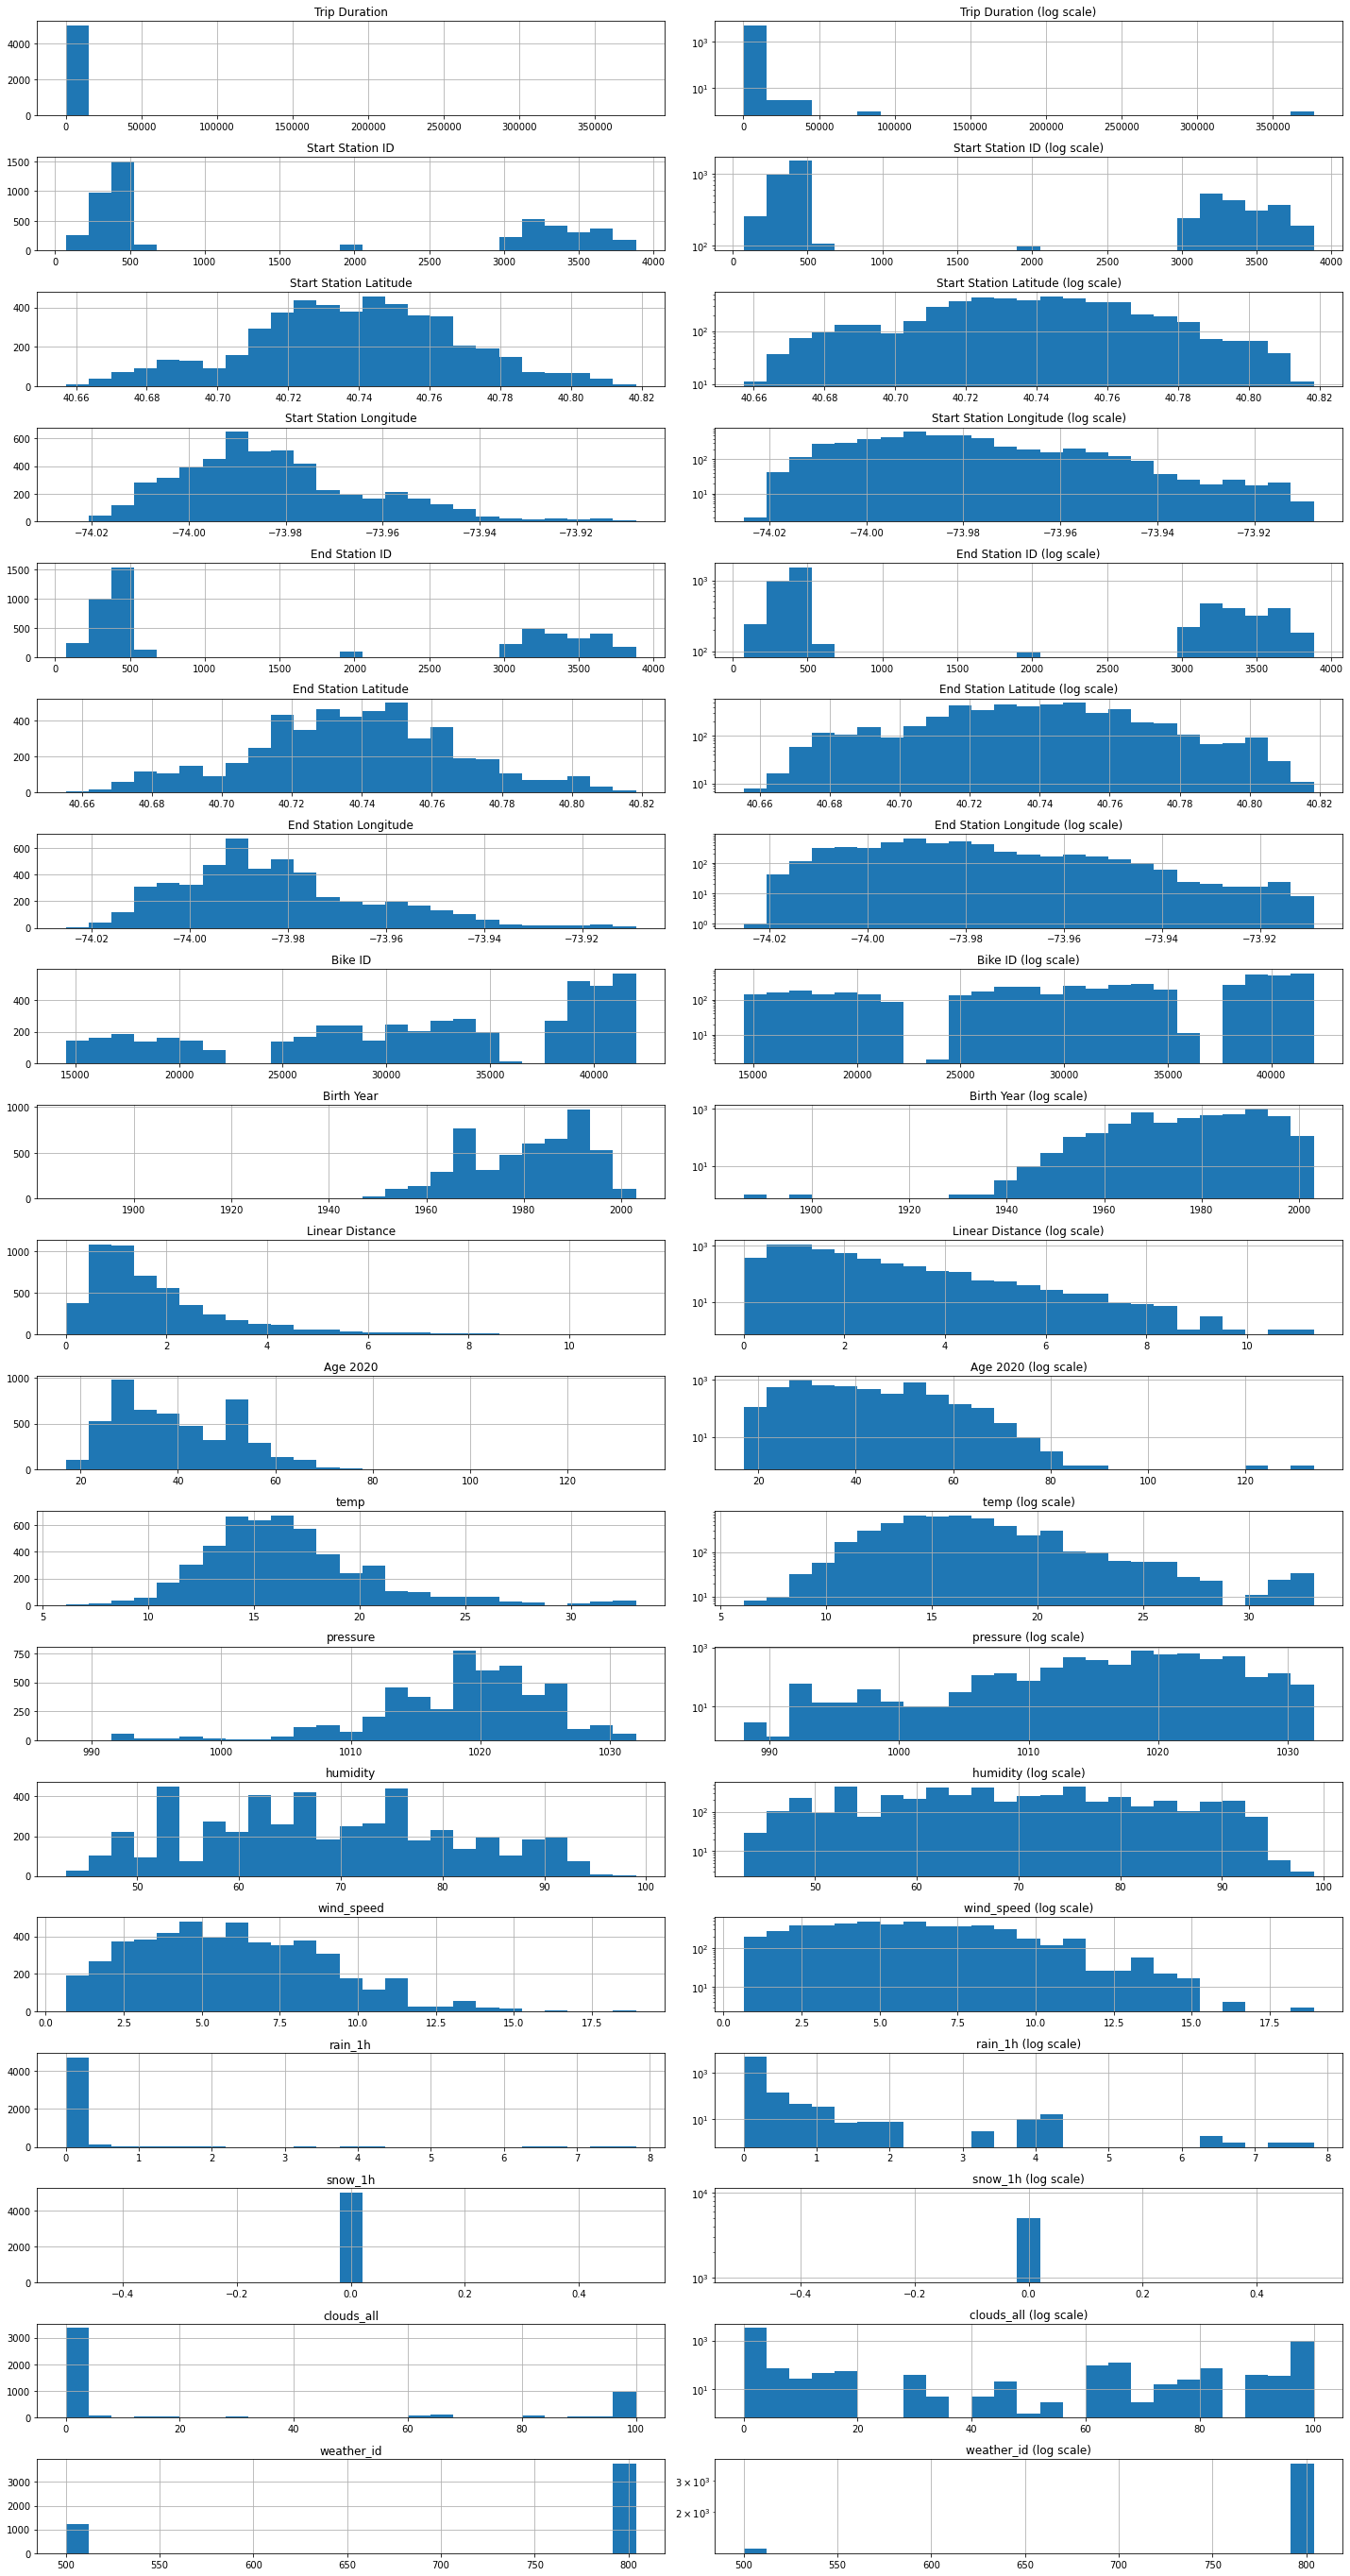

CPU times: user 4.74 s, sys: 166 ms, total: 4.91 s
Wall time: 4.76 s


In [51]:
%%time
numeric_columns = filter_numeric_columns(tripweather)

fig = plt.figure(figsize=(20, len(numeric_columns) * 2))
gs = gridspec.GridSpec(len(numeric_columns), 2, figure=fig)

for idx, col in enumerate(numeric_columns):
    ax = fig.add_subplot(gs[idx, 0])
    ax.set_title(col)
    hist = tripweather[col].hist(ax=ax, bins=25)
    
    ax = fig.add_subplot(gs[idx, 1])
    ax.set_title(col + ' (log scale)')
    hist = tripweather[col].hist(ax=ax, bins=25)
    ax.set_yscale('log')
    
fig.tight_layout()
plt.show()

### Tripweather Samples per Day

In [52]:
tripweather_samples_per_day = pd.read_parquet(os.path.join(path, 'samples_per_day-citibike-tripweather.parquet'))

In [53]:
tripweather_samples_per_day.shape

(24880, 28)

In [54]:
tripweather_samples_per_day.isna().sum()

dt_utc                        0
Trip Duration                 0
Start Time                    0
Stop Time                     0
Start Station ID              0
Start Station Name            0
Start Station Latitude        0
Start Station Longitude       0
End Station ID                0
End Station Name              0
End Station Latitude          0
End Station Longitude         0
Bike ID                       0
User Type                     0
Birth Year                 1713
Gender                        0
Linear Distance               0
Age 2020                   1713
temp                          0
pressure                      0
humidity                      0
wind_speed                    0
rain_1h                       0
snow_1h                       0
clouds_all                    0
weather_id                    0
weather_main                  0
weather_description           0
dtype: int64

In [55]:
def filter_numeric_columns(df):
    res = []
    for col in df.columns:
        if df[col].dtype == np.float64 or df[col].dtype == np.int64 or isinstance(df[col].dtype, pd.Int64Dtype):
            res.append(col)
    return res

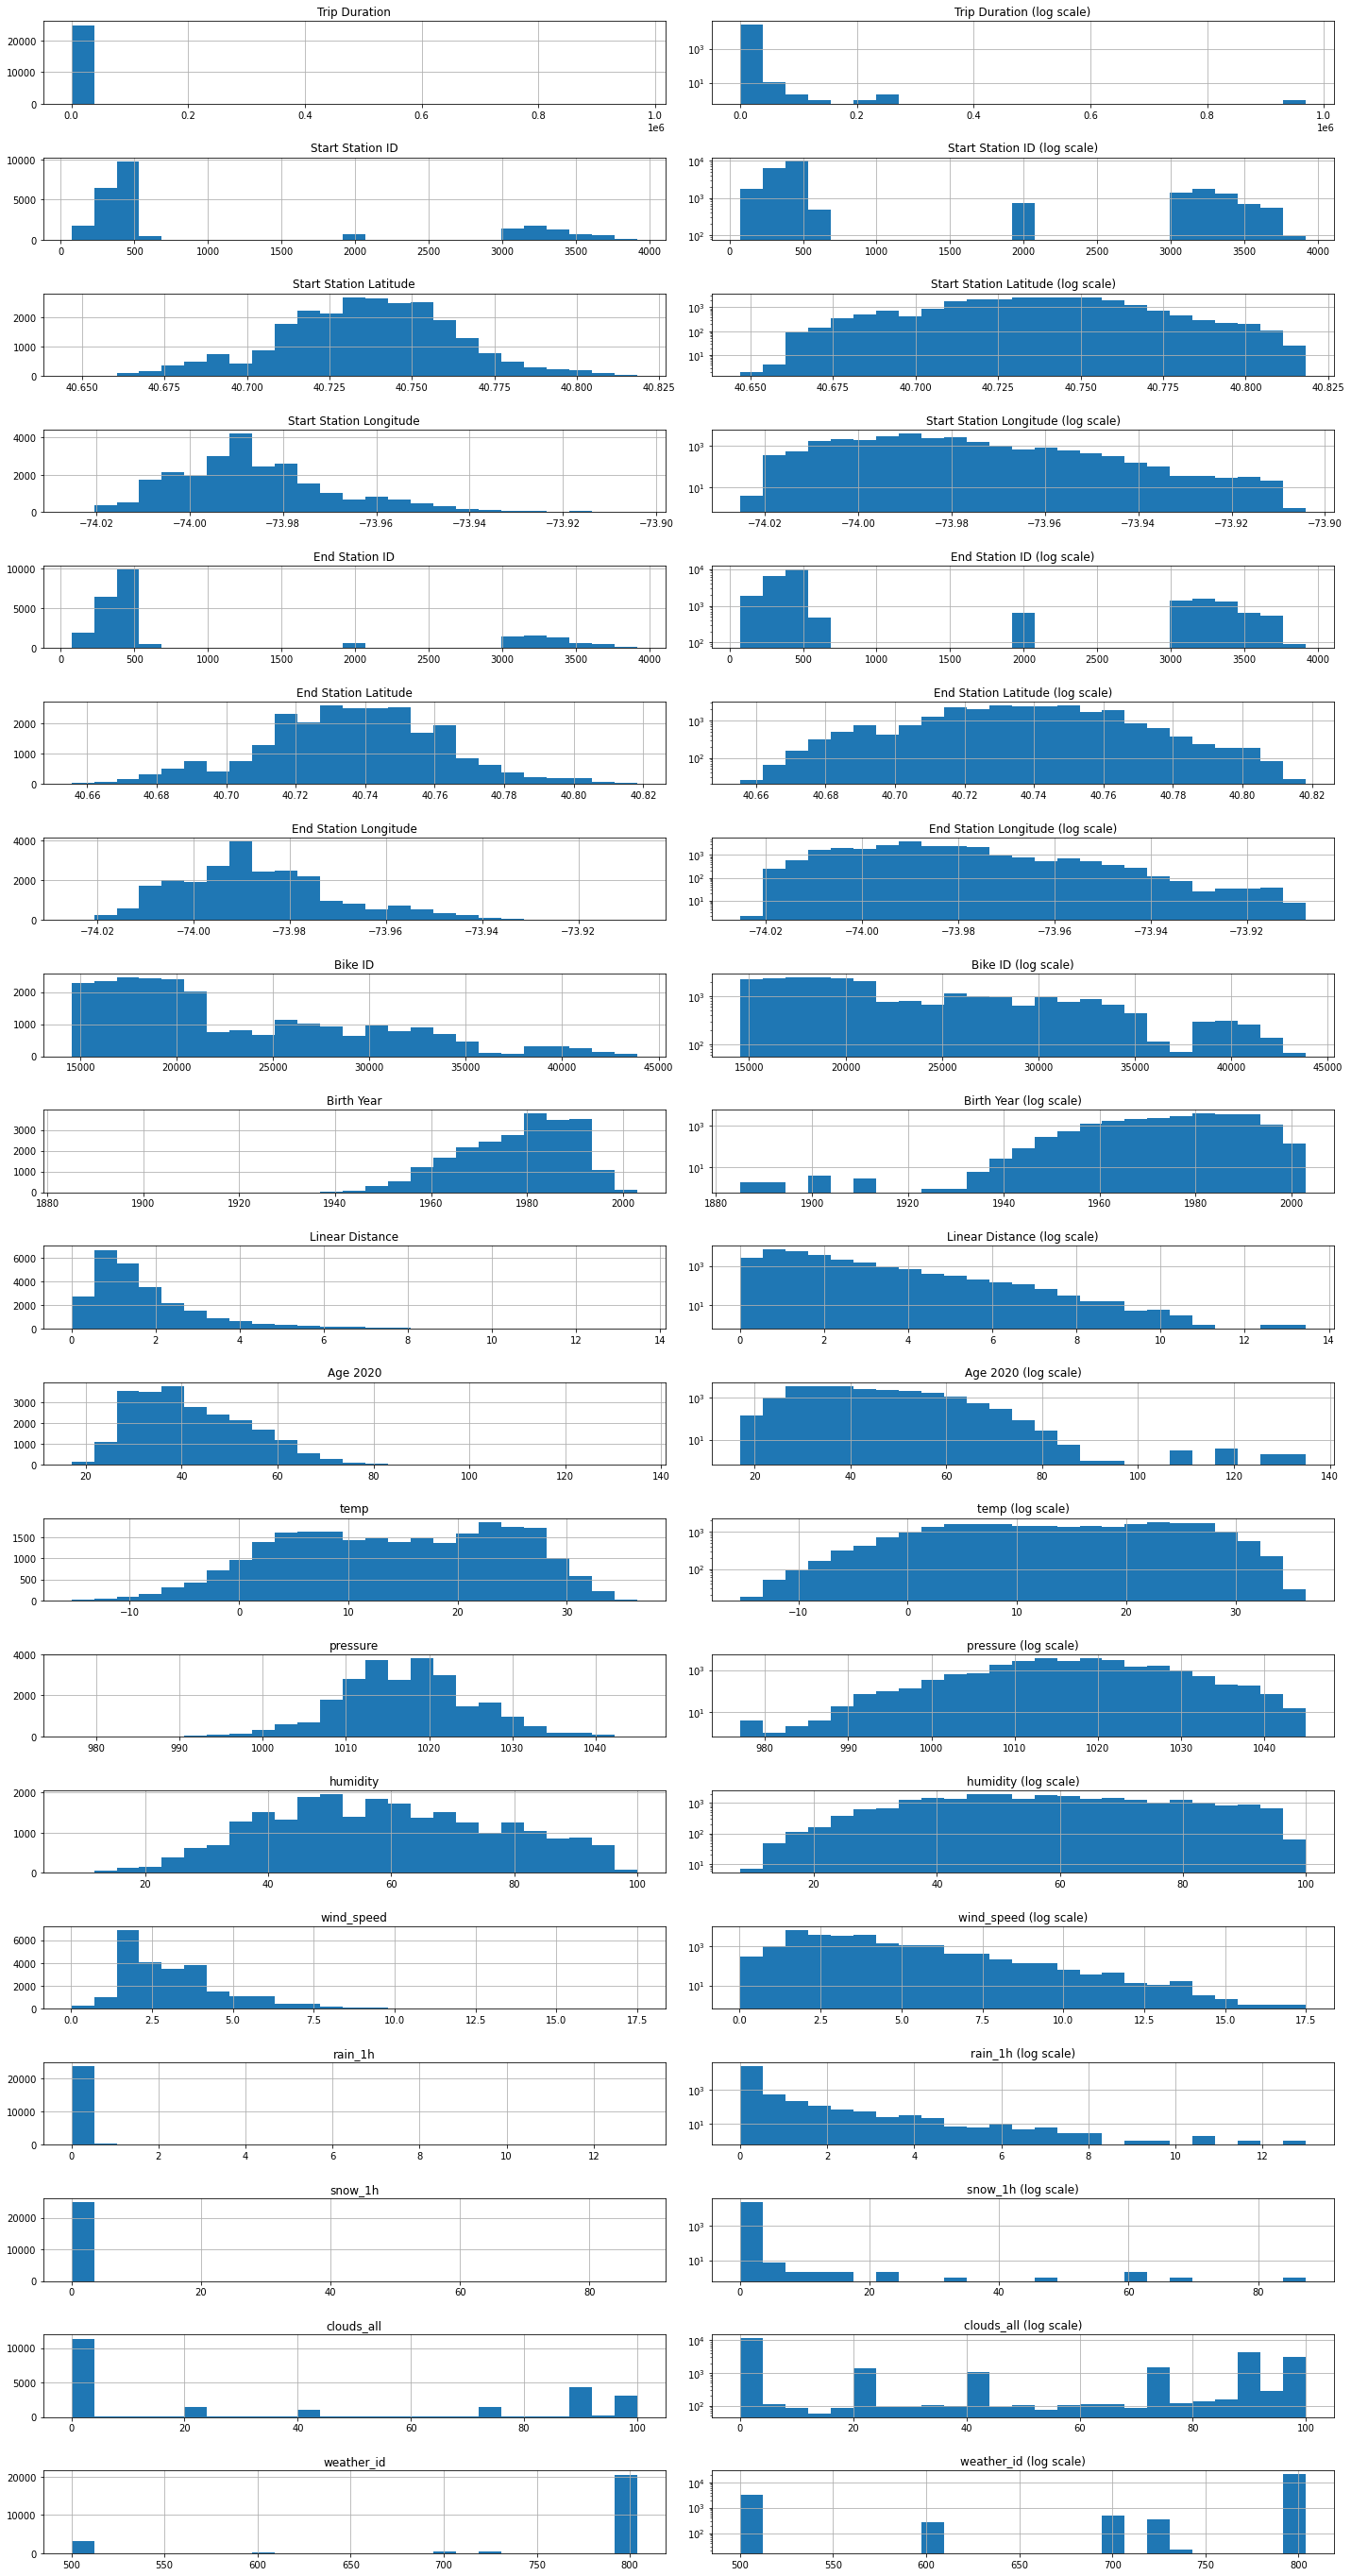

CPU times: user 4.72 s, sys: 148 ms, total: 4.86 s
Wall time: 4.71 s


In [56]:
%%time
numeric_columns = filter_numeric_columns(tripweather_samples_per_day)

fig = plt.figure(figsize=(20, len(numeric_columns) * 2))
gs = gridspec.GridSpec(len(numeric_columns), 2, figure=fig)

for idx, col in enumerate(numeric_columns):
    ax = fig.add_subplot(gs[idx, 0])
    ax.set_title(col)
    hist = tripweather_samples_per_day[col].hist(ax=ax, bins=25)
    
    ax = fig.add_subplot(gs[idx, 1])
    ax.set_title(col + ' (log scale)')
    hist = tripweather_samples_per_day[col].hist(ax=ax, bins=25)
    ax.set_yscale('log')
    
fig.tight_layout()
plt.show()

### Tripweather Samples per Month

In [57]:
tripweather_samples_per_month = pd.read_parquet(os.path.join(path, 'samples_per_month-citibike-tripweather.parquet'))

In [58]:
tripweather_samples_per_month.shape

(8200, 28)

In [59]:
tripweather_samples_per_month.isna().sum()

dt_utc                       0
Trip Duration                0
Start Time                   0
Stop Time                    0
Start Station ID             0
Start Station Name           0
Start Station Latitude       0
Start Station Longitude      0
End Station ID               0
End Station Name             0
End Station Latitude         0
End Station Longitude        0
Bike ID                      0
User Type                    0
Birth Year                 532
Gender                       0
Linear Distance              0
Age 2020                   532
temp                         0
pressure                     0
humidity                     0
wind_speed                   0
rain_1h                      0
snow_1h                      0
clouds_all                   0
weather_id                   0
weather_main                 0
weather_description          0
dtype: int64

In [60]:
def filter_numeric_columns(df):
    res = []
    for col in df.columns:
        if df[col].dtype == np.float64 or df[col].dtype == np.int64 or isinstance(df[col].dtype, pd.Int64Dtype):
            res.append(col)
    return res

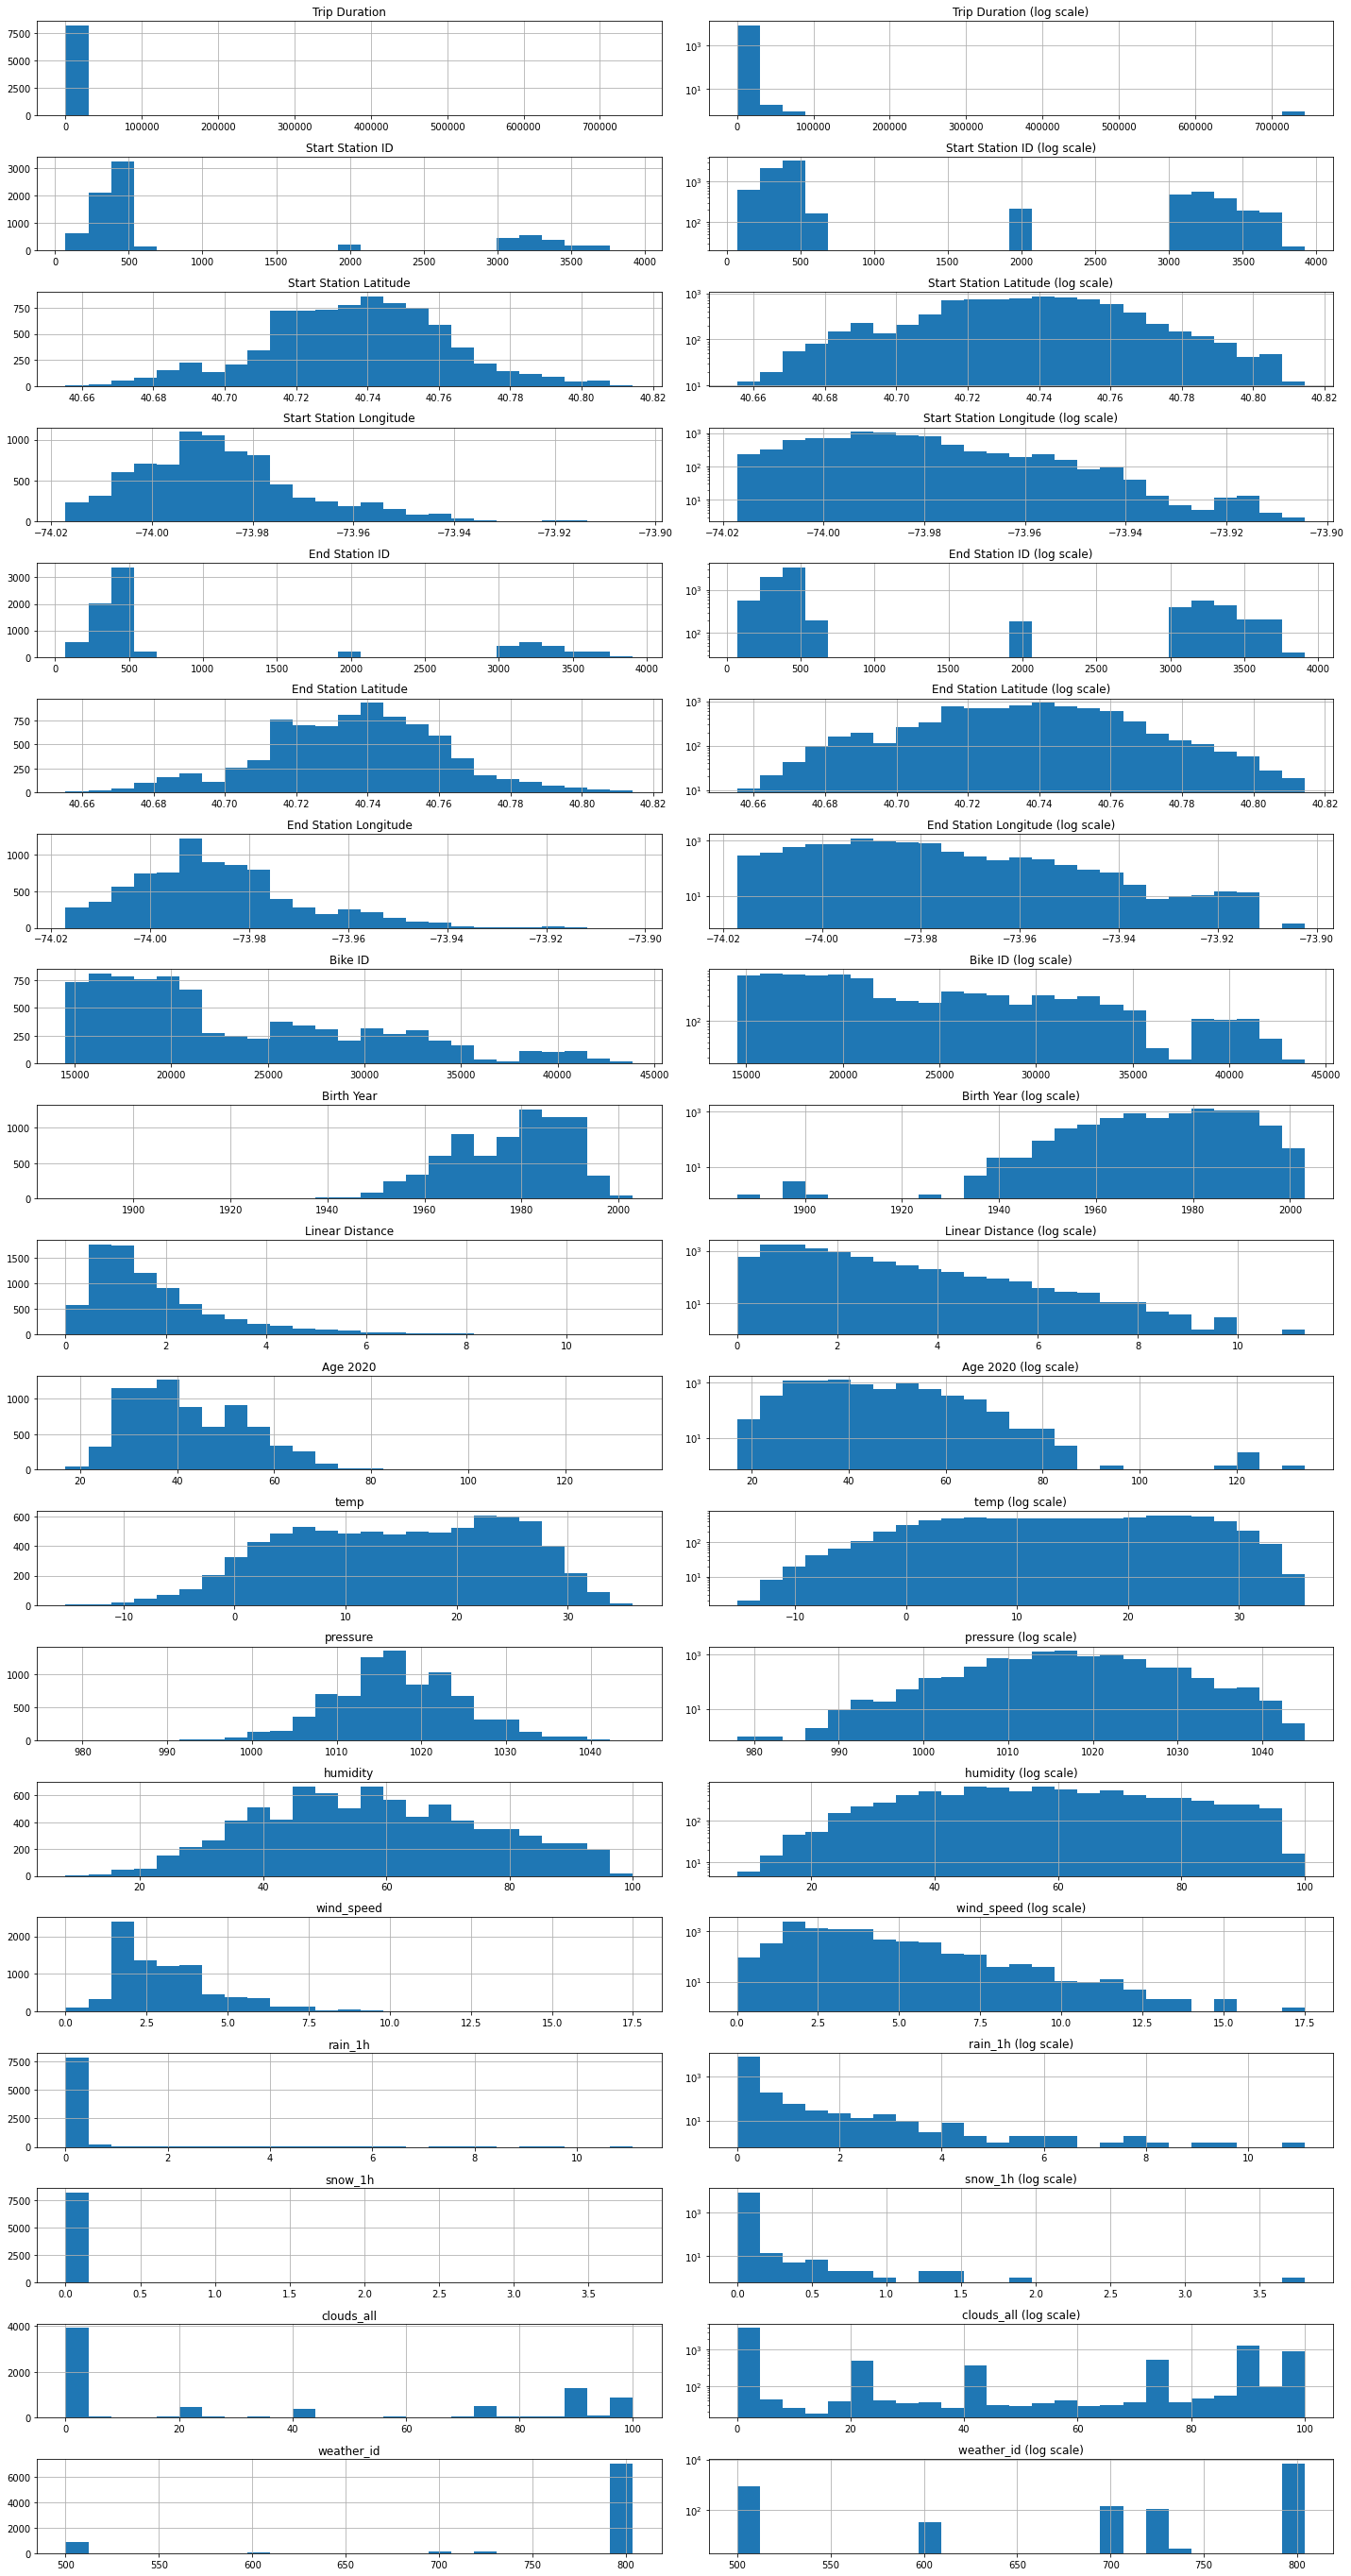

CPU times: user 4.65 s, sys: 127 ms, total: 4.78 s
Wall time: 4.62 s


In [61]:
%%time
numeric_columns = filter_numeric_columns(tripweather_samples_per_month)

fig = plt.figure(figsize=(20, len(numeric_columns) * 2))
gs = gridspec.GridSpec(len(numeric_columns), 2, figure=fig)

for idx, col in enumerate(numeric_columns):
    ax = fig.add_subplot(gs[idx, 0])
    ax.set_title(col)
    hist = tripweather_samples_per_month[col].hist(ax=ax, bins=25)
    
    ax = fig.add_subplot(gs[idx, 1])
    ax.set_title(col + ' (log scale)')
    hist = tripweather_samples_per_month[col].hist(ax=ax, bins=25)
    ax.set_yscale('log')
    
fig.tight_layout()
plt.show()

### Tripweather Daily Summary, Subscribers only

In [62]:
tripweather_summary = pd.read_parquet(os.path.join(path, 'summary-daily-subscribers_only-citibike-tripweather.parquet'))

In [63]:
tripweather_summary.head()

Trip count  Trip Duration mean  Trip Duration std  \
Date                                                            
2013-07-01 13879.00000           828.61056          782.80061   
2013-07-02 18641.00000           809.20809          706.63899   
2013-07-03 17684.00000           817.00000          710.73944   
2013-07-04 11525.00000           928.18777          880.79229   
2013-07-05 13634.00000           839.78612          799.78276   

            Trip Duration min  Trip Duration median  Trip Duration max  \
Date                                                                     
2013-07-01           60.00000             653.00000        21471.00000   
2013-07-02           60.00000             649.00000        19715.00000   
2013-07-03           60.00000             649.00000        19835.00000   
2013-07-04           62.00000             709.00000        19906.00000   
2013-07-05           60.00000             646.00000        21153.00000   

            Linear Distance mean  Linear Distance std  Linear Distance min  \
Date                                                                         
2013-07-01               2.03342              1.54745              0.00000   
2013-07-02               2.03158              1.52694              0.00000   
2013-07-03               2.00884              1.51973              0.00000   
2013-07-04               1.90151              1.48907              0.00000   
2013-07-05               1.95498              1.53162              0.00000   

            Linear Distance median  ...  wind_speed std  wind_speed median  \
Date                                ...                                      
2013-07-01                 1.58576  ...         0.67212            2.20000   
2013-07-02                 1.59272  ...         0.91226            2.10000   
2013-07-03                 1.56416  ...         0.79714            2.60000   
2013-07-04                 1.48944  ...         0.91110            2.35000   
2013-07-05                 1.49333  ...         0.85110            2.60000   

            wind_speed min  wind_speed max  rain_1h sum  rain_1h min  \
Date                                                                   
2013-07-01         1.50000         3.60000     20.27000      0.00000   
2013-07-02         1.50000         4.21000      0.90000      0.00000   
2013-07-03         1.50000         4.20000     24.45000      0.00000   
2013-07-04         1.50000         4.57000      2.50000      0.00000   
2013-07-05         1.50000         4.60000      0.00000      0.00000   

            rain_1h max  snow_1h sum  snow_1h min  snow_1h max  
Date                                                            
2013-07-01      4.77000      0.00000      0.00000      0.00000  
2013-07-02      0.30000      0.00000      0.00000      0.00000  
2013-07-03      6.60000      0.00000      0.00000      0.00000  
2013-07-04      2.50000      0.00000      0.00000      0.00000  
2013-07-05      0.00000      0.00000      0.00000      0.00000  

[5 rows x 38 columns]

In [64]:
tripweather_summary.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2488 entries, 2013-07-01 to 2020-04-30
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip count              2488 non-null   float64
 1   Trip Duration mean      2488 non-null   float64
 2   Trip Duration std       2488 non-null   float64
 3   Trip Duration min       2488 non-null   float64
 4   Trip Duration median    2488 non-null   float64
 5   Trip Duration max       2488 non-null   float64
 6   Linear Distance mean    2488 non-null   float64
 7   Linear Distance std     2488 non-null   float64
 8   Linear Distance min     2488 non-null   float64
 9   Linear Distance median  2488 non-null   float64
 10  Linear Distance max     2488 non-null   float64
 11  Age 2020 count          2488 non-null   float64
 12  Age 2020 mean           2488 non-null   float64
 13  Age 2020 std            2488 non-null   float64
 14  Age 2020 min          

In [65]:
tripweather_summary.shape

(2488, 38)

In [66]:
tripweather_summary.isna().sum().sum()

0

In [67]:
def filter_numeric_columns(df):
    res = []
    for col in df.columns:
        if df[col].dtype == np.float64 or df[col].dtype == np.int64 or isinstance(df[col].dtype, pd.Int64Dtype):
            res.append(col)
    return res

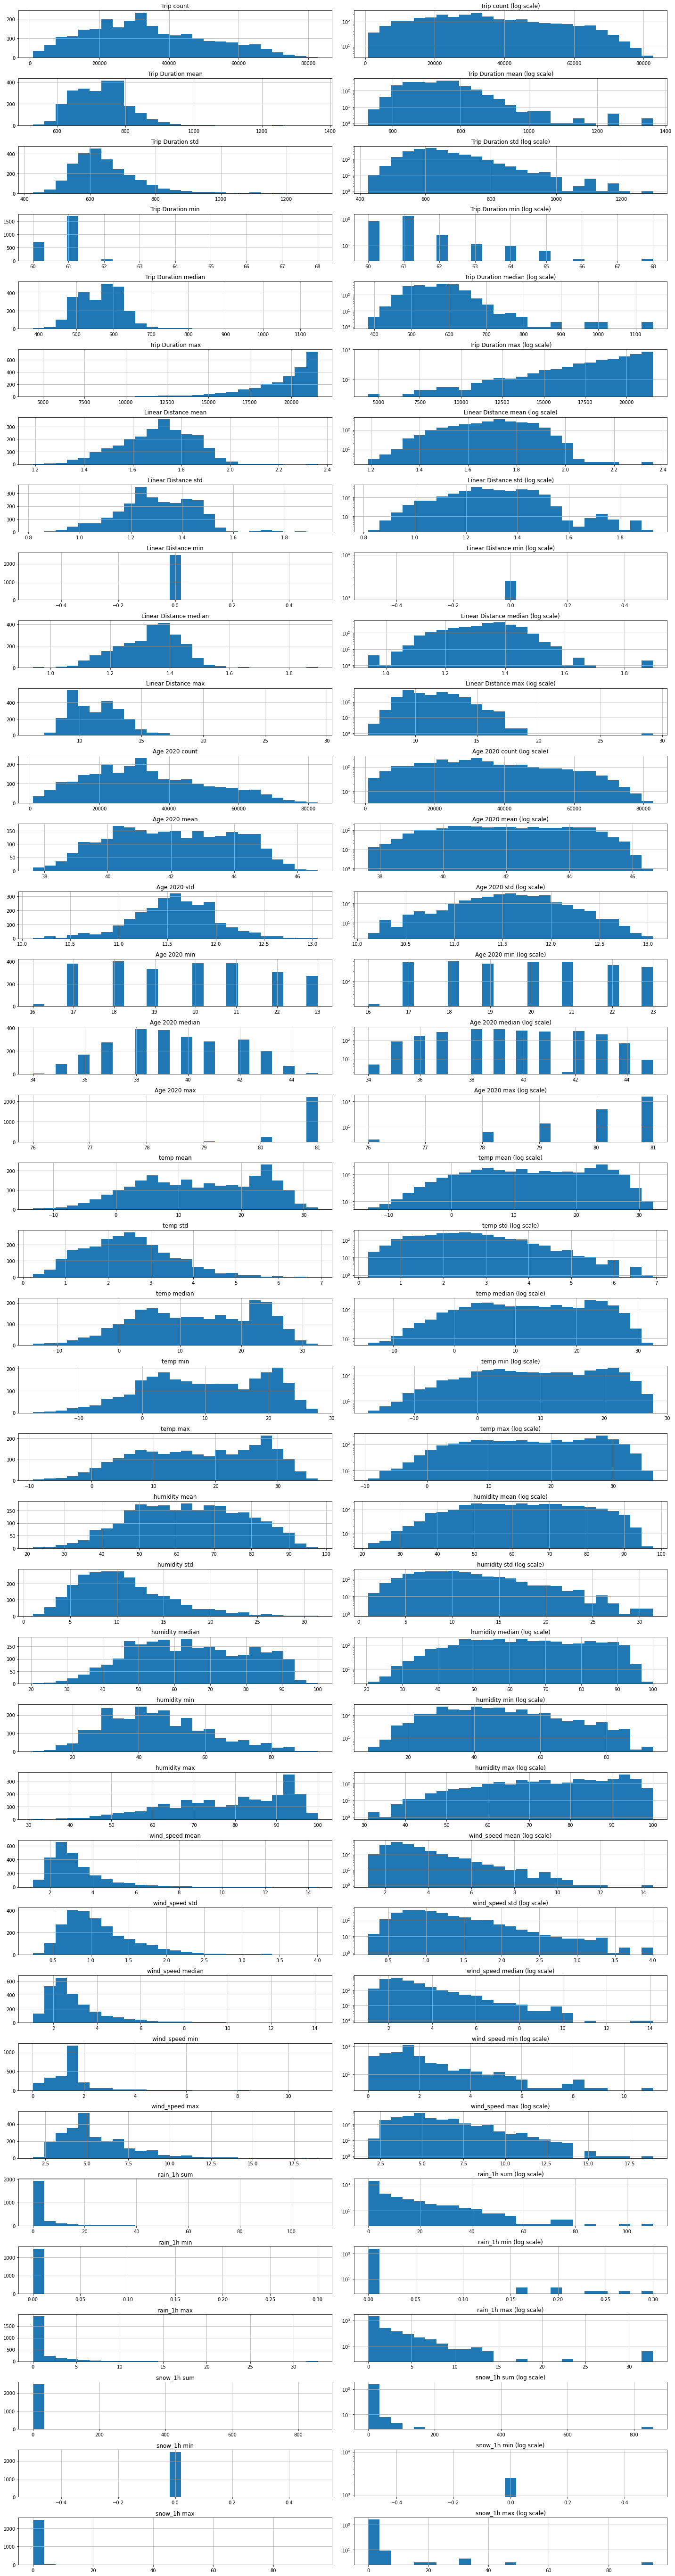

CPU times: user 9.7 s, sys: 174 ms, total: 9.88 s
Wall time: 9.72 s


In [68]:
%%time
numeric_columns = filter_numeric_columns(tripweather_summary)

fig = plt.figure(figsize=(20, len(numeric_columns) * 2))
gs = gridspec.GridSpec(len(numeric_columns), 2, figure=fig)

for idx, col in enumerate(numeric_columns):
    ax = fig.add_subplot(gs[idx, 0])
    ax.set_title(col)
    hist = tripweather_summary[col].hist(ax=ax, bins=25)
    
    ax = fig.add_subplot(gs[idx, 1])
    ax.set_title(col + ' (log scale)')
    hist = tripweather_summary[col].hist(ax=ax, bins=25)
    ax.set_yscale('log')
    
fig.tight_layout()
plt.show()

### Tripweather Daily Summary, Subscribers only, Grouped by Gender

In [69]:
tripweather_summary_grouped = pd.read_parquet(os.path.join(path, 'summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet'))

In [70]:
tripweather_summary_grouped.head()

Gender  Trip count  Trip Duration mean  Trip Duration std  \
Date                                                                   
2013-07-01      1 11071.00000           808.64547          792.89735   
2013-07-01      2  2808.00000           907.32621          736.53408   
2013-07-02      0     3.00000           706.33333          461.58567   
2013-07-02      1 14616.00000           781.76300          701.85402   
2013-07-02      2  4022.00000           909.02064          715.20259   

            Trip Duration min  Trip Duration median  Trip Duration max  \
Date                                                                     
2013-07-01           60.00000             632.00000        21471.00000   
2013-07-01           62.00000             740.00000        17260.00000   
2013-07-02          329.00000             569.00000         1221.00000   
2013-07-02           60.00000             623.00000        19715.00000   
2013-07-02           60.00000             760.50000        17957.00000   

            Linear Distance mean  Linear Distance std  Linear Distance min  \
Date                                                                         
2013-07-01               2.03159              1.56165              0.00000   
2013-07-01               2.04062              1.49039              0.00000   
2013-07-02               1.61334              0.77527              0.87256   
2013-07-02               2.01545              1.53419              0.00000   
2013-07-02               2.09052              1.49947              0.00000   

            ...  wind_speed std  wind_speed median  wind_speed min  \
Date        ...                                                      
2013-07-01  ...         0.67212            2.20000         1.50000   
2013-07-01  ...         0.67212            2.20000         1.50000   
2013-07-02  ...         0.91226            2.10000         1.50000   
2013-07-02  ...         0.91226            2.10000         1.50000   
2013-07-02  ...         0.91226            2.10000         1.50000   

            wind_speed max  rain_1h sum  rain_1h min  rain_1h max  \
Date                                                                
2013-07-01         3.60000     20.27000      0.00000      4.77000   
2013-07-01         3.60000     20.27000      0.00000      4.77000   
2013-07-02         4.21000      0.90000      0.00000      0.30000   
2013-07-02         4.21000      0.90000      0.00000      0.30000   
2013-07-02         4.21000      0.90000      0.00000      0.30000   

            snow_1h sum  snow_1h min  snow_1h max  
Date                                               
2013-07-01      0.00000      0.00000      0.00000  
2013-07-01      0.00000      0.00000      0.00000  
2013-07-02      0.00000      0.00000      0.00000  
2013-07-02      0.00000      0.00000      0.00000  
2013-07-02      0.00000      0.00000      0.00000  

[5 rows x 39 columns]

In [71]:
tripweather_summary_grouped.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7277 entries, 2013-07-01 to 2020-04-30
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  7277 non-null   category
 1   Trip count              7277 non-null   float64 
 2   Trip Duration mean      7277 non-null   float64 
 3   Trip Duration std       7277 non-null   float64 
 4   Trip Duration min       7277 non-null   float64 
 5   Trip Duration median    7277 non-null   float64 
 6   Trip Duration max       7277 non-null   float64 
 7   Linear Distance mean    7277 non-null   float64 
 8   Linear Distance std     7277 non-null   float64 
 9   Linear Distance min     7277 non-null   float64 
 10  Linear Distance median  7277 non-null   float64 
 11  Linear Distance max     7277 non-null   float64 
 12  Age 2020 count          7277 non-null   float64 
 13  Age 2020 mean           7277 non-null   float64 
 14  Age 20

In [72]:
tripweather_summary_grouped.shape

(7277, 39)

In [73]:
tripweather_summary_grouped.isna().sum().sum()

0

In [74]:
def filter_numeric_columns(df):
    res = []
    for col in df.columns:
        if df[col].dtype == np.float64 or df[col].dtype == np.int64 or isinstance(df[col].dtype, pd.Int64Dtype):
            res.append(col)
    return res

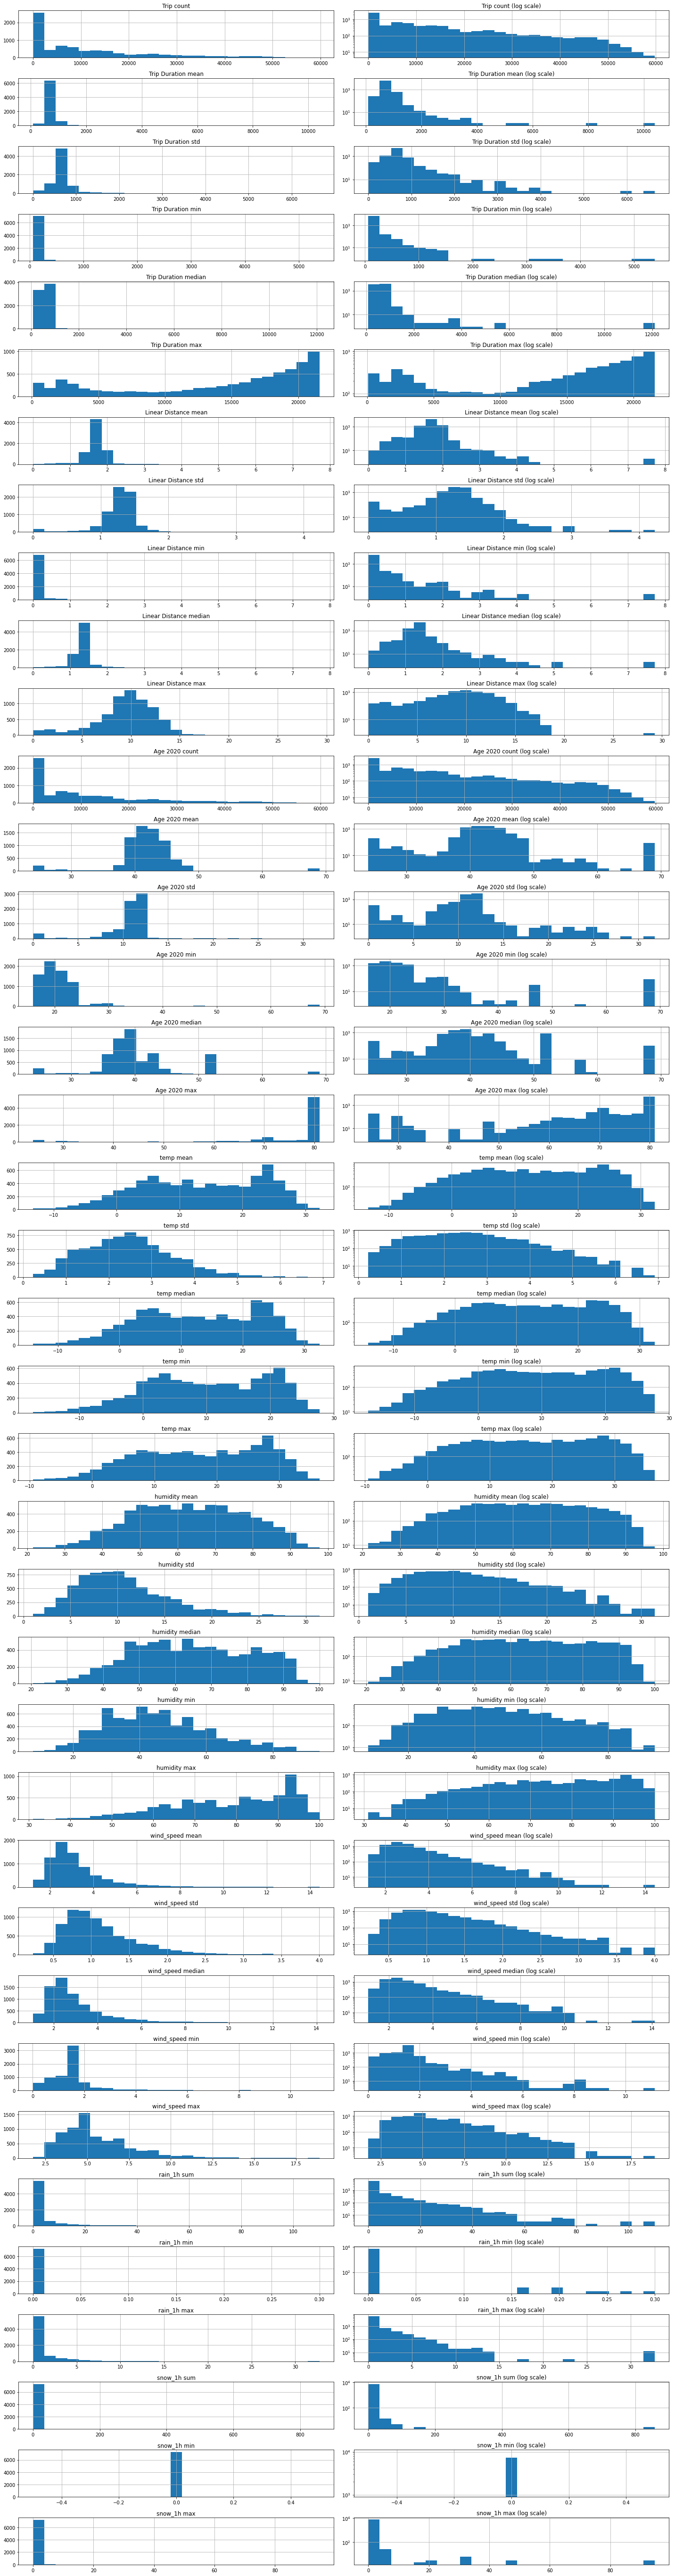

CPU times: user 9.29 s, sys: 146 ms, total: 9.43 s
Wall time: 9.28 s


In [75]:
%%time
numeric_columns = filter_numeric_columns(tripweather_summary_grouped)

fig = plt.figure(figsize=(20, len(numeric_columns) * 2))
gs = gridspec.GridSpec(len(numeric_columns), 2, figure=fig)

for idx, col in enumerate(numeric_columns):
    ax = fig.add_subplot(gs[idx, 0])
    ax.set_title(col)
    hist = tripweather_summary_grouped[col].hist(ax=ax, bins=25)
    
    ax = fig.add_subplot(gs[idx, 1])
    ax.set_title(col + ' (log scale)')
    hist = tripweather_summary_grouped[col].hist(ax=ax, bins=25)
    ax.set_yscale('log')
    
fig.tight_layout()
plt.show()